In [1]:
import os
import random
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

ROOT_DIR = "./data"
RANDOM_SEED = 110

np.random.seed(RANDOM_SEED)
%matplotlib inline
sns.set_style(rc={"axes.unicode_minus":False},
        style='darkgrid')

pd.options.display.max_columns = 200

In [2]:
# read csv
df = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
df.head()

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Z Unit Time_Dam,CURE END POSITION Z Judge Value_Dam,CURE END POSITION Θ Collect Result_Dam,CURE END POSITION Θ Unit Time_Dam,CURE END POSITION Θ Judge Value_Dam,CURE SPEED Collect Result_Dam,CURE SPEED Unit Time_Dam,CURE SPEED Judge Value_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION X Unit Time_Dam,CURE STANDBY POSITION X Judge Value_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Z Unit Time_Dam,CURE STANDBY POSITION Z Judge Value_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE STANDBY POSITION Θ Unit Time_Dam,CURE STANDBY POSITION Θ Judge Value_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION X Unit Time_Dam,CURE START POSITION X Judge Value_Dam,CURE START POSITION Z Collect Result_Dam,CURE START POSITION Z Unit Time_Dam,CURE START POSITION Z Judge Value_Dam,CURE START POSITION Θ Collect Result_Dam,CURE START POSITION Θ Unit Time_Dam,CURE START POSITION Θ Judge Value_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED SPEED OF RESIN Unit Time_Dam,DISCHARGED SPEED OF RESIN Judge Value_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Unit Time_Dam,DISCHARGED TIME OF RESIN(Stage1) Judge Value_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Unit Time_Dam,DISCHARGED TIME OF RESIN(Stage2) Judge Value_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Unit Time_Dam,DISCHARGED TIME OF RESIN(Stage3) Judge Value_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage1) Unit Time_Dam,Dispense Volume(Stage1) Judge Value_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage2) Unit Time_Dam,Dispense Volume(Stage2) Judge Value_Dam,Dispense Volume(Stage3) Collect Result_Dam,Dispense Volume(Stage3) Unit Time_Dam,Dispense Volume(Stage3) Judge Value_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Unit Time_Dam,HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Unit Time_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Judge Value_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Unit Time_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Judge Value_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Unit Time_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Judge Value_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Unit Time_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Judge Value_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Unit Time_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Judge Value_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Unit Time_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Judge Value_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage2) Unit Time_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage2) Judge Value_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage3) Unit Time_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage3) Judge Value_Dam,HEAD Standby Position X Collect Result_Dam,HEAD Standby Position X Unit Time_Dam,HEAD Standby Position X Judge Value_Dam,HEAD Standby Position Y Collect Result_Dam,HEAD Standby Position Y Unit Time_Dam,HEAD Standby Position Y Judge Value_Dam,HEAD Standby Position Z Collect Result_Dam,HEAD Standby Position Z Unit Time_Dam,HEAD Standby Position Z Judge Value_Dam,Head

### NaN

In [3]:
nan_columns = df.columns[df.isnull().any()]
# 대부분 전부 NaN이거나 최소 약 만 천 개 이상 NaN이라서 전부 삭제
df.drop(nan_columns, axis=1, inplace=True) # 464 entries -> 178 entries

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 178 entries, Wip Line_Dam to target
dtypes: float64(72), int64(77), object(29)
memory usage: 55.0+ MB


In [5]:
df.head()

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Z Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam,HEAD Standby Position X Collect Result_Dam,HEAD Standby Position Y Collect Result_Dam,HEAD Standby Position Z Collect Result_Dam,Head Clean Position X Collect Result_Dam,Head Clean Position Y Collect Result_Dam,Head Clean Position Z Collect Result_Dam,Head Purge Position X Collect Result_Dam,Head Purge Position Y Collect Result_Dam,Head Purge Position Z Collect Result_Dam,Head Zero Position X Collect Result_Dam,Head Zero Position Y Collect Result_Dam,Head Zero Position Z Collect Result_Dam,Machine Tact time Collect Result_Dam,PalletID Collect Result_Dam,Production Qty Collect Result_Dam,Receip No Collect Result_Dam,Stage1 Circle1 Distance Speed Collect Result_Dam,Stage1 Circle2 Distance Speed Collect Result_Dam,Stage1 Circle3 Distance Speed Collect Result_Dam,Stage1 Circle4 Distance Speed Collect Result_Dam,Stage1 Line1 Distance Speed Collect Result_Dam,Stage1 Line2 Distance Speed Collect Result_Dam,Stage1 Line3 Distance Speed Collect Result_Dam,Stage1 Line4 Distance Speed Collect Result_Dam,Stage2 Circle1 Distance Speed Collect Result_Dam,Stage2 Circle2 Distance Speed Collect Result_Dam,Stage2 Circle3 Distance Speed Collect Result_Dam,Stage2 Circle4 Distance Speed Collect Result_Dam,Stage2 Line1 Distance Speed Collect Result_Dam,Stage2 Line2 Distance Speed Collect Result_Dam,Stage2 Line3 Distance Speed Collect Result_Dam,Stage2 Line4 Distance Speed Collect Result_Dam,Stage3 Circle1 Distance Speed Collect Result_Dam,Stage3 Circle2 Distance Speed Collect Result_Dam,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line2 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam,WorkMode Collect Result_Dam,Wip Line_AutoClave,Process Desc._AutoClave,Equipment_AutoClave,Model.Suffix_AutoClave,Workorder_AutoClave,Insp. Seq No._AutoClave,Insp Judge Code_AutoClave,1st Pressure Collect Result_AutoClave,1st Pressure 1st Pressure Unit Time_AutoClave,1st Pressure Judge Value_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,2nd Pressure Judge Value_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,3rd Pressure Judge Value_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Chamber Temp. Judge Value_AutoClave,Wip Line_Fill1,Process Desc._Fill1,Equipment_Fill1,Model.Suffix_Fill1,Workorder_Fill1,Insp. Seq No._Fill1,Insp Judge Code_Fill1,DISCHARGED SPEED OF RESIN Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage1) 

### Duplicates

In [6]:
CAT = ["Dam", "AutoClave", "Fill1", "Fill2"]

In [7]:
wip_line = [f"Wip Line_{cat}" for cat in CAT]
sum(df.duplicated(subset=wip_line)) # 전부 동일한 행

40505

In [8]:
for cat in CAT:
    print(df[f"Wip Line_{cat}"].unique())

['IVI-OB6']
['IVI-OB6']
['IVI-OB6']
['IVI-OB6']


In [9]:
# 전부 IVI-OB6이므로 삭제
df.drop(wip_line, axis=1, inplace=True) # 178 entries -> 174 entries

In [10]:
for cat in CAT:
    print(cat, df[f"Process Desc._{cat}"].unique())

Dam ['Dam Dispenser']
AutoClave ['Auto Clave Out']
Fill1 ['Fill1 Dispenser']
Fill2 ['Fill2 Dispenser']


In [11]:
for cat in CAT:
    print(cat, df[f"Equipment_{cat}"].unique())

Dam ['Dam dispenser #1' 'Dam dispenser #2']
AutoClave ['Auto Clave Out']
Fill1 ['Fill1 dispenser #1' 'Fill1 dispenser #2']
Fill2 ['Fill2 dispenser #1' 'Fill2 dispenser #2']


In [12]:
process_desc = [f"Process Desc._{cat}" for cat in CAT]
# Equipment가 Process Desc. 역할하고 있으므로 전부 삭제
df.drop(process_desc, axis=1, inplace=True) # 174 entries -> 170 entries

In [13]:
for cat in CAT:
    col = f"Equipment_{cat}"
    if cat == "AutoClave": # AutoClave는 Auto Clave Out으로 전부 같으므로 삭제
        df.drop(col, axis=1, inplace=True) # 170 entries -> 169 entries
    else:
        df[col] = df[col].str.split("#", expand=True)[1] # e.g.Dam dispenser #1 -> 1 / Dam dispenser #2 -> 2

In [14]:
for cat in CAT:
    print(df[f"Model.Suffix_{cat}"].unique())

['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']
['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']
['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']
['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']


In [15]:
model_suffix = [f"Model.Suffix_{cat}" for cat in CAT]
df[~df.duplicated(subset=model_suffix)][model_suffix]

,Model.Suffix_Dam,Model.Suffix_AutoClave,Model.Suffix_Fill1,Model.Suffix_Fill2
0,AJX75334505,AJX75334505,AJX75334505,AJX75334505
2,AJX75334501,AJX75334501,AJX75334501,AJX75334501
17,AJX75334502,AJX75334502,AJX75334502,AJX75334502
24,AJX75334507,AJX75334507,AJX75334507,AJX75334507
141,AJX75334506,AJX75334506,AJX75334506,AJX75334506
301,AJX75334508,AJX75334508,AJX75334508,AJX75334508
605,AJX75334503,AJX75334503,AJX75334503,AJX75334503


In [16]:
df["Model.Suffix"] = df["Model.Suffix_Dam"]
model_suffix = [f"Model.Suffix_{cat}" for cat in CAT]
# 전부 같으므로 통합한 Model.Suffix 열 만들고 다 삭제
df.drop(model_suffix, axis=1, inplace=True) # 169 entries -> 166 entries

In [17]:
df["Model.Suffix"].str[:4].unique()
# 모두 AJX7므로 대카테고리 안만들기로 함

array(['AJX7'], dtype=object)

In [18]:
for cat in CAT:
    print(df[f"Insp. Seq No._{cat}"].unique())

[1]
[1]
[1]
[1]


In [19]:
insp_seq_no = [f"Insp. Seq No._{cat}" for cat in CAT]
# 모두 값이 1로 같으므로 전부 삭제
df.drop(insp_seq_no, axis=1, inplace=True) # 166 entries -> 162 entries

In [20]:
for cat in CAT:
    print(df[f"Insp Judge Code_{cat}"].unique())

['OK']
['OK']
['OK']
['OK']


In [21]:
insp_jude_code = [f"Insp Judge Code_{cat}" for cat in CAT]
# 모두 값이 OK로 같으므로 전부 삭제
df.drop(insp_jude_code, axis=1, inplace=True) # 162 entries -> 158 entries

In [22]:
# Workorder 전부 같으므로 통합한 Workorder 카테고리 만들고 전부 삭제
df["Workorder"] = df["Workorder_Dam"]
work_order = [f"Workorder_{cat}" for cat in CAT]
df.drop(work_order, axis=1, inplace=True) # 158 entries -> 155 entries

In [23]:
df["Workorder"].str.split('-', expand=True)[0].str[:4].unique()

array(['4F1X', '3KPM', '4E1X', '3K1X', '3HPM', '3G1X', '3M1X', '4A1X',
       '3H1X', '3L1X', '3GPM', '3F1X', '4B1X', '4C1X', '3MPX', '3I1X',
       '3J1X', '3JPX', '4CPM', '3LPM', '4BPX', '4BPM', '3HPX', '4CPX',
       '4EPM', '3FPM', '4APX', '3KPX', '3FPX'], dtype=object)

In [24]:
df["Workorder Category"] = df["Workorder"].str.split('-', expand=True)[0].str[:4] # 156 entries

In [25]:
df.rename(columns={"1st Pressure 1st Pressure Unit Time_AutoClave": "1st Pressure Unit Time_AutoClave"}, inplace=True)

In [26]:
# df.to_csv(os.path.join(ROOT_DIR, "pre_1.csv"), index=False)

### AutoClave

In [27]:
grouped_columns = utils.get_columns_group(df)

In [28]:
df_auto = df[grouped_columns["AutoClave"]]
df_auto.head()

,1st Pressure Collect Result_AutoClave,1st Pressure Unit Time_AutoClave,1st Pressure Judge Value_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,2nd Pressure Judge Value_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,3rd Pressure Judge Value_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave,Chamber Temp. Judge Value_AutoClave
0,0.312,240,OK,0.493,1,OK,0.499,120,OK,54,361,OK
1,0.311,241,OK,0.311,121,OK,0.498,121,OK,54,483,OK
2,0.315,241,OK,0.490,1,OK,0.498,121,OK,56,363,OK
3,0.299,241,OK,0.300,121,OK,0.500,121,OK,54,483,OK
4,0.302,240,OK,0.302,120,OK,0.498,120,OK,47,480,NG


In [29]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   1st Pressure Collect Result_AutoClave   40506 non-null  float64
 1   1st Pressure Unit Time_AutoClave        40506 non-null  int64  
 2   1st Pressure Judge Value_AutoClave      40506 non-null  object 
 3   2nd Pressure Collect Result_AutoClave   40506 non-null  float64
 4   2nd Pressure Unit Time_AutoClave        40506 non-null  int64  
 5   2nd Pressure Judge Value_AutoClave      40506 non-null  object 
 6   3rd Pressure Collect Result_AutoClave   40506 non-null  float64
 7   3rd Pressure Unit Time_AutoClave        40506 non-null  int64  
 8   3rd Pressure Judge Value_AutoClave      40506 non-null  object 
 9   Chamber Temp. Collect Result_AutoClave  40506 non-null  int64  
 10  Chamber Temp. Unit Time_AutoClave       40506 non-null  in

In [30]:
df_auto.describe()

,1st Pressure Collect Result_AutoClave,1st Pressure Unit Time_AutoClave,2nd Pressure Collect Result_AutoClave,2nd Pressure Unit Time_AutoClave,3rd Pressure Collect Result_AutoClave,3rd Pressure Unit Time_AutoClave,Chamber Temp. Collect Result_AutoClave,Chamber Temp. Unit Time_AutoClave
count,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000
mean,0.307124,244.949119,0.396764,56.932035,0.501117,122.104059,51.691725,423.985212
std,0.005369,21.475360,0.096129,56.123765,0.025190,8.775836,2.878083,61.066771
min,0.290000,0.000000,0.297000,0.000000,0.305000,1.000000,32.000000,3.000000
25%,0.302000,241.000000,0.309000,1.000000,0.498000,120.000000,49.000000,363.000000
50%,0.308000,241.000000,0.316000,60.000000,0.499000,121.000000,52.000000,452.000000
75%,0.312000,241.000000,0.491000,121.000000,0.500000,121.000000,54.000000,483.000000
max,0.319000,300.000000,0.900000,181.000000,0.914000,301.000000,59.000000,540.000000


In [31]:
df["1st Pressure Judge Value_AutoClave"].unique()

array(['OK'], dtype=object)

In [32]:
df["2nd Pressure Judge Value_AutoClave"].unique()

array(['OK'], dtype=object)

In [33]:
df["3rd Pressure Judge Value_AutoClave"].unique()

array(['OK'], dtype=object)

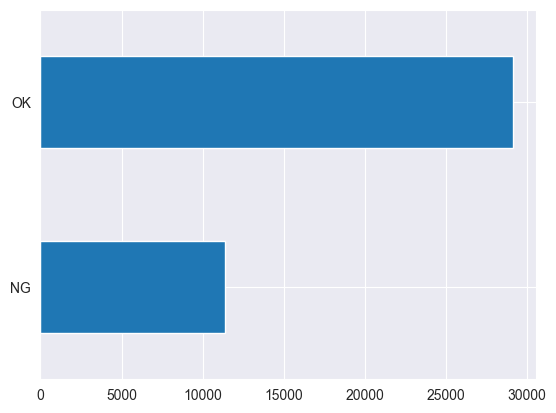

In [34]:
df["Chamber Temp. Judge Value_AutoClave"].value_counts().sort_values().plot(kind="barh");

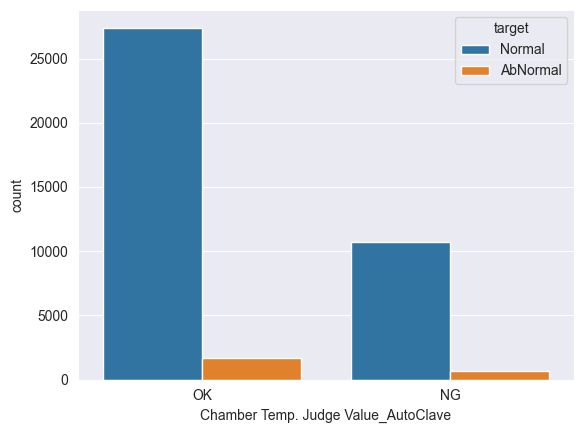

In [35]:
sns.countplot(x="Chamber Temp. Judge Value_AutoClave", hue="target", data=df);

In [36]:
# 모두 Ok 값이므로 삭제
df.drop(["1st Pressure Judge Value_AutoClave",
         "2nd Pressure Judge Value_AutoClave",
         "3rd Pressure Judge Value_AutoClave"], axis=1, inplace=True) # 153 entries

In [37]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit_transform(df["Chamber Temp. Judge Value_AutoClave"])

# # Ok (1) NG (0)
# df["Chamber Temp. Judge Value_AutoClave"] = le.fit_transform(df["Chamber Temp. Judge Value_AutoClave"])

In [38]:
pressure_unit_time = df[["1st Pressure Unit Time_AutoClave", 
                         "2nd Pressure Unit Time_AutoClave",
                         "3rd Pressure Unit Time_AutoClave",]]

df["Mean Pressure Unit Time_AutoClave"] = pressure_unit_time.apply("mean", axis=1).astype('int64')

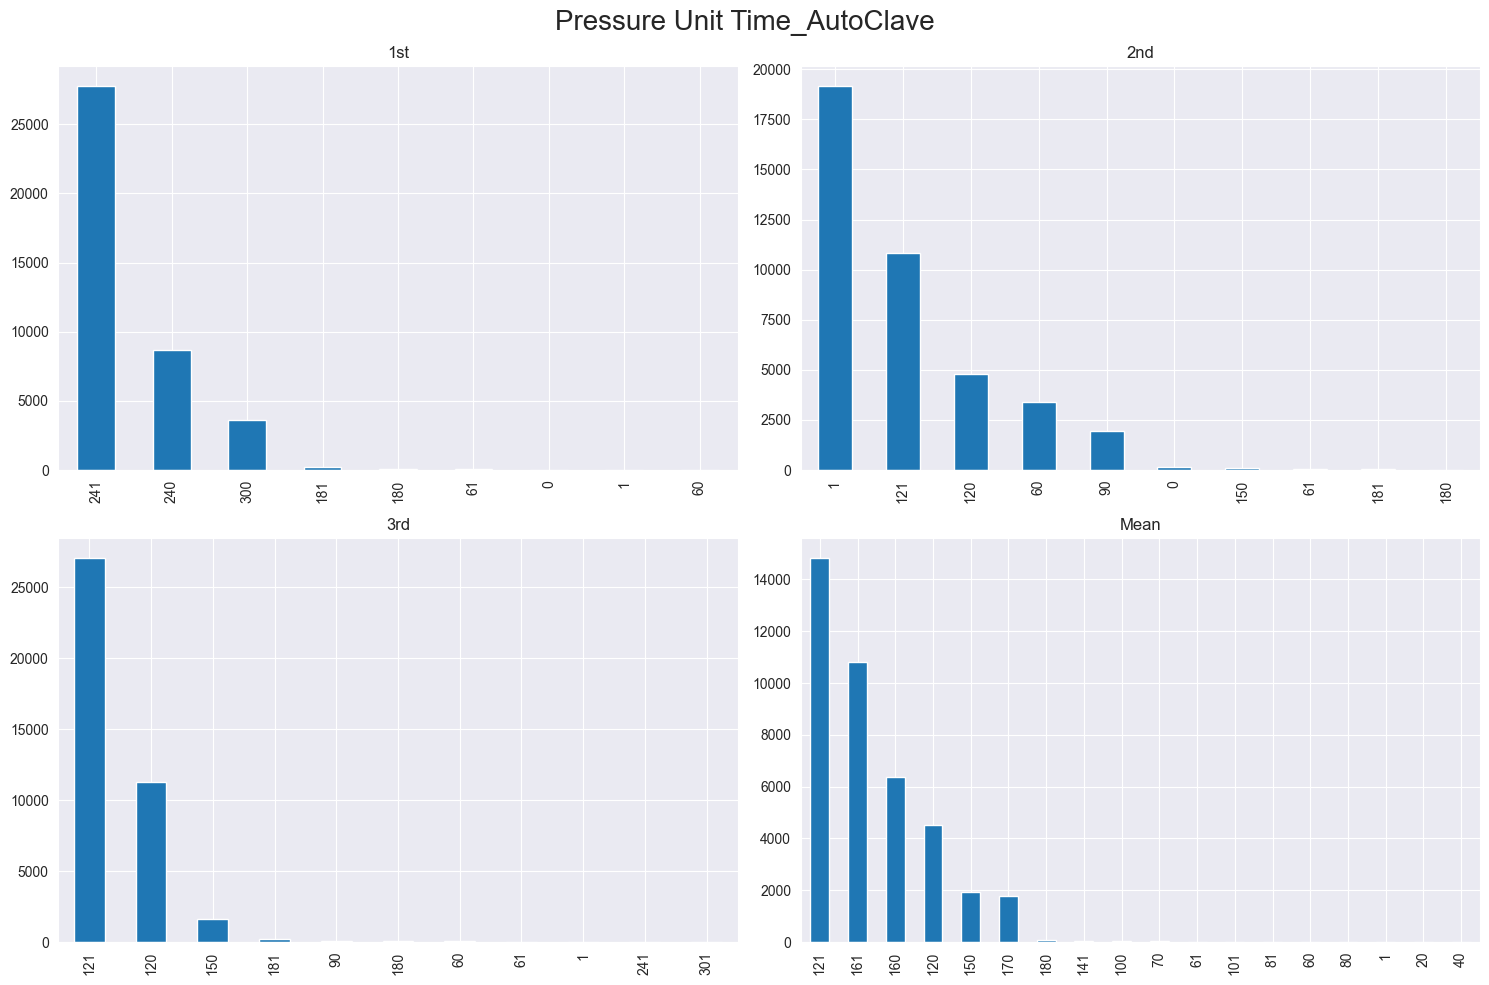

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

df["1st Pressure Unit Time_AutoClave"].value_counts().plot.bar(ax=axes[0, 0], title="1st");
df["2nd Pressure Unit Time_AutoClave"].value_counts().plot.bar(ax=axes[0, 1], title="2nd");
df["3rd Pressure Unit Time_AutoClave"].value_counts().plot.bar(ax=axes[1, 0], title="3rd");
df["Mean Pressure Unit Time_AutoClave"].value_counts().plot.bar(ax=axes[1, 1], title="Mean");
fig.suptitle("Pressure Unit Time_AutoClave", size=20)
plt.tight_layout();

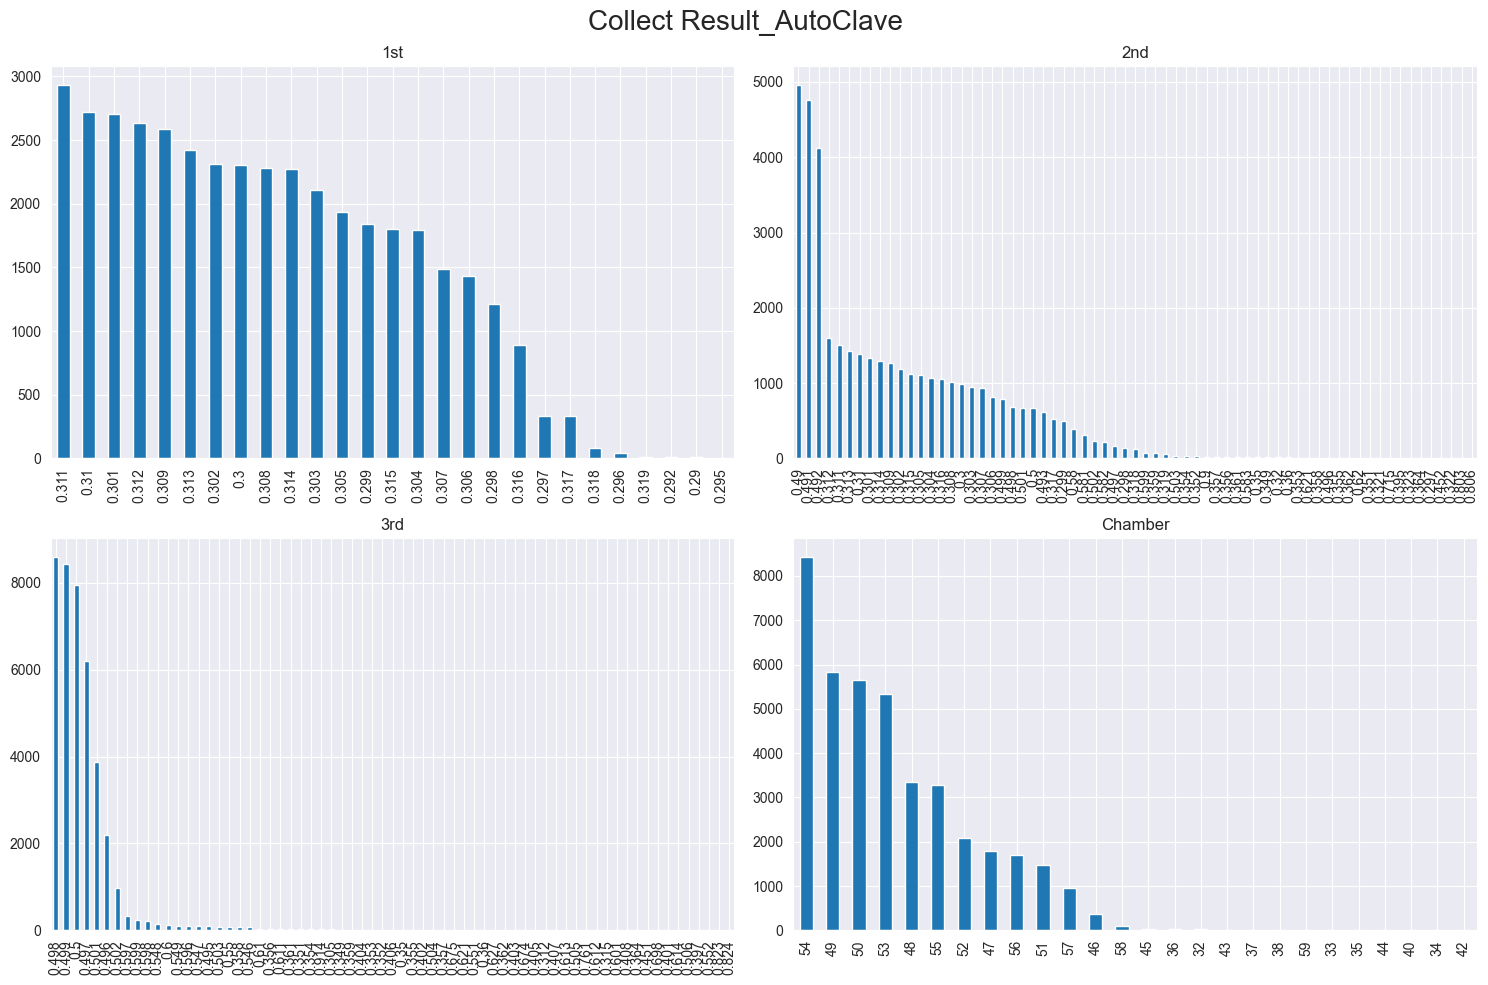

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

df["1st Pressure Collect Result_AutoClave"].value_counts().plot.bar(ax=axes[0, 0], title="1st");
df["2nd Pressure Collect Result_AutoClave"].value_counts().plot.bar(ax=axes[0, 1], title="2nd");
df["3rd Pressure Collect Result_AutoClave"].value_counts().plot.bar(ax=axes[1, 0], title="3rd");
df["Chamber Temp. Collect Result_AutoClave"].value_counts().plot.bar(ax=axes[1, 1], title="Chamber");
fig.suptitle("Collect Result_AutoClave", size=20)
plt.tight_layout();

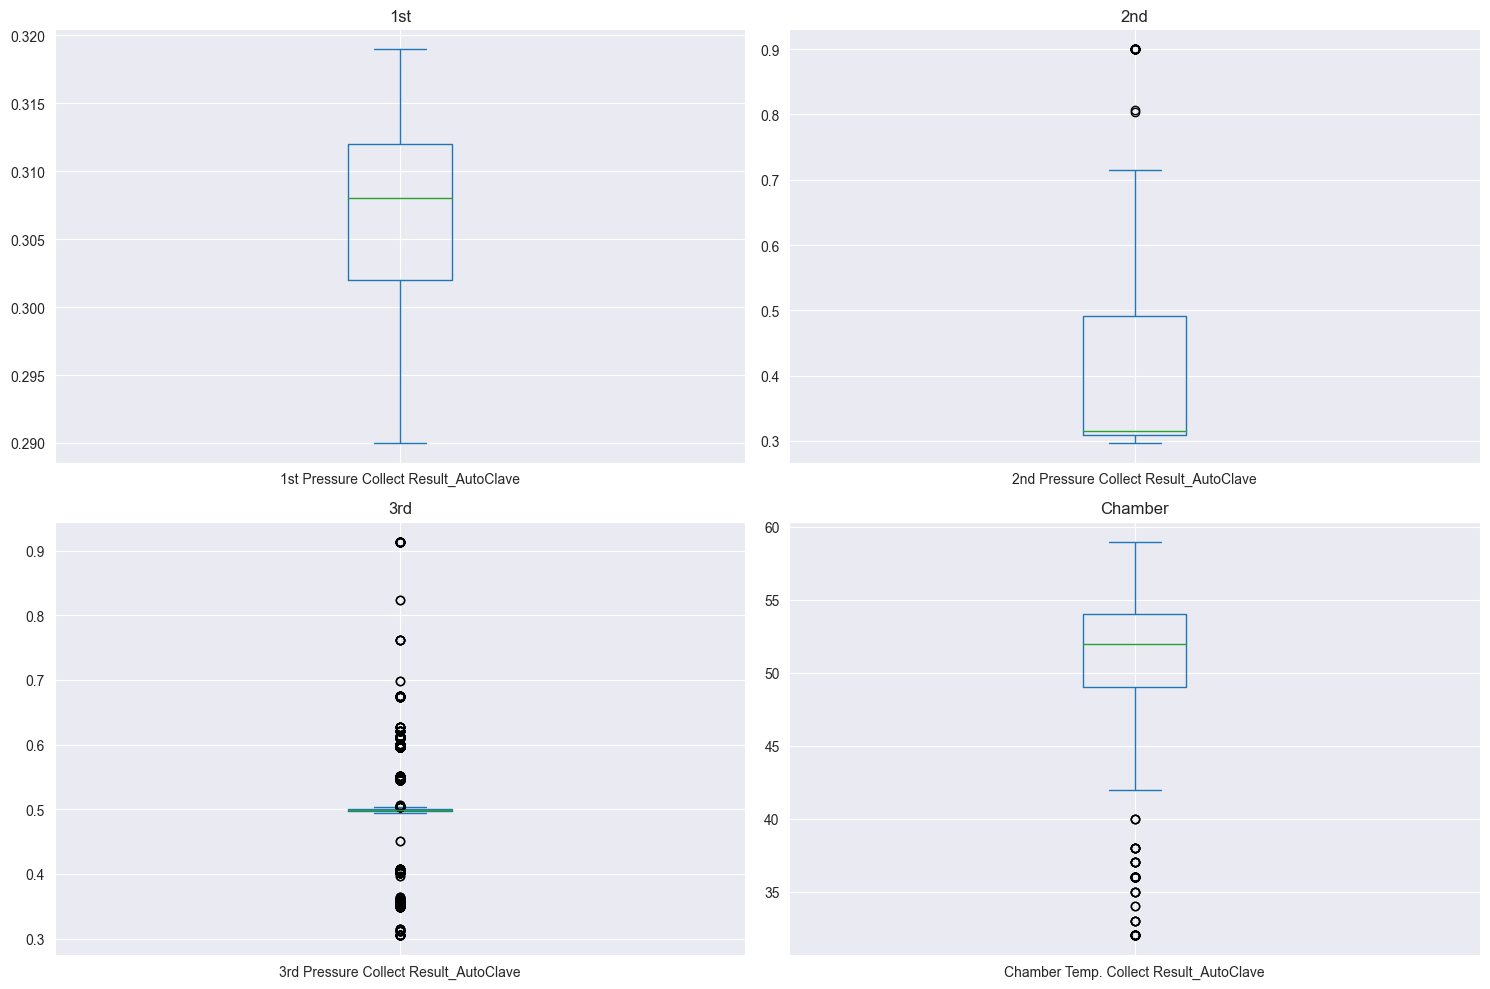

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

df["1st Pressure Collect Result_AutoClave"].plot.box(ax=axes[0, 0], title="1st");
df["2nd Pressure Collect Result_AutoClave"].plot.box(ax=axes[0, 1], title="2nd");
df["3rd Pressure Collect Result_AutoClave"].plot.box(ax=axes[1, 0], title="3rd");
df["Chamber Temp. Collect Result_AutoClave"].plot.box(ax=axes[1, 1], title="Chamber");
plt.tight_layout();

In [42]:
# Q1 = df['3rd Pressure Collect Result_AutoClave'].quantile(0.25)
# Q3 = df['3rd Pressure Collect Result_AutoClave'].quantile(0.75)
# IQR = Q3 - Q1
# print(f"Q1: {Q1}")
# print(f"Q3: {Q3}") # 2098개

In [43]:
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df = df[(df['3rd Pressure Collect Result_AutoClave'] >= lower_bound) & (df['3rd Pressure Collect Result_AutoClave'] <= upper_bound)]

In [44]:
# df["3rd Pressure Collect Result_AutoClave"].plot.box();

In [45]:
pressure_collect_result = df[["1st Pressure Collect Result_AutoClave", 
                              "2nd Pressure Collect Result_AutoClave",
                              "3rd Pressure Collect Result_AutoClave",]]

df["Mean Pressure Collect Result_AutoClave"] = pressure_collect_result.apply("mean", axis=1).round(3)

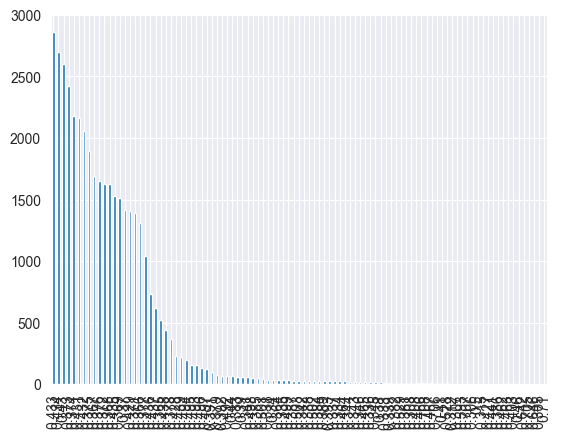

In [46]:
df["Mean Pressure Collect Result_AutoClave"].value_counts().plot.bar();

## Dam

In [47]:
grouped_columns = utils.get_columns_group(df)
df_dam = df[grouped_columns["Dam"]]
df_dam.head(3).T

,0,1,2
Equipment_Dam,1,1,2
CURE END POSITION X Collect Result_Dam,240.0,240.0,1000.0
CURE END POSITION Z Collect Result_Dam,2.5,2.5,12.5
CURE END POSITION Θ Collect Result_Dam,-90,-90,90
CURE SPEED Collect Result_Dam,100,70,85
...,...,...,...
Stage3 Line4 Distance Speed Collect Result_Dam,5800,4000,5800
THICKNESS 1 Collect Result_Dam,5800,0,5800
THICKNESS 2 Collect Result_Dam,0.0,0.0,0.012
THICKNESS 3 Collect Result_Dam,0.0,0.0,-0.022


In [48]:
df_dam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 70 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Equipment_Dam                                             40506 non-null  object 
 1   CURE END POSITION X Collect Result_Dam                    40506 non-null  float64
 2   CURE END POSITION Z Collect Result_Dam                    40506 non-null  float64
 3   CURE END POSITION Θ Collect Result_Dam                    40506 non-null  int64  
 4   CURE SPEED Collect Result_Dam                             40506 non-null  int64  
 5   CURE STANDBY POSITION X Collect Result_Dam                40506 non-null  int64  
 6   CURE STANDBY POSITION Z Collect Result_Dam                40506 non-null  float64
 7   CURE STANDBY POSITION Θ Collect Result_Dam                40506 non-null  int64  
 8   CURE START POSIT

In [49]:
df_dam.describe()

,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE STANDBY POSITION Θ Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Z Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam,HEAD Standby Position X Collect Result_Dam,HEAD Standby Position Y Collect Result_Dam,HEAD Standby Position Z Collect Result_Dam,Head Clean Position X Collect Result_Dam,Head Clean Position Y Collect Result_Dam,Head Clean Position Z Collect Result_Dam,Head Purge Position X Collect Result_Dam,Head Purge Position Y Collect Result_Dam,Head Purge Position Z Collect Result_Dam,Head Zero Position X Collect Result_Dam,Head Zero Position Y Collect Result_Dam,Head Zero Position Z Collect Result_Dam,Machine Tact time Collect Result_Dam,PalletID Collect Result_Dam,Production Qty Collect Result_Dam,Receip No Collect Result_Dam,Stage1 Circle1 Distance Speed Collect Result_Dam,Stage1 Circle2 Distance Speed Collect Result_Dam,Stage1 Circle3 Distance Speed Collect Result_Dam,Stage1 Circle4 Distance Speed Collect Result_Dam,Stage1 Line1 Distance Speed Collect Result_Dam,Stage1 Line2 Distance Speed Collect Result_Dam,Stage1 Line3 Distance Speed Collect Result_Dam,Stage1 Line4 Distance Speed Collect Result_Dam,Stage2 Circle1 Distance Speed Collect Result_Dam,Stage2 Circle2 Distance Speed Collect Result_Dam,Stage2 Circle3 Distance Speed Collect Result_Dam,Stage2 Circle4 Distance Speed Collect Result_Dam,Stage2 Line1 Distance Speed Collect Result_Dam,Stage2 Line2 Distance Speed Collect Result_Dam,Stage2 Line3 Distance Speed Collect Result_Dam,Stage2 Line4 Distance Speed Collect Result_Dam,Stage3 Circle1 Distance Speed Collect Result_Dam,Stage3 Circle2 Distance Speed Collect Result_Dam,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line2 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam,WorkMode Collect Result_Dam
count,40506.000000,40506.000000,40506.000000,40506.000000,40506.0,40506.0,40506.0,40506.000000,40506.0,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.00000,40506.00000,40506.00000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000
mean,530.370809,6.320669,-21.227966,73

#### CURE

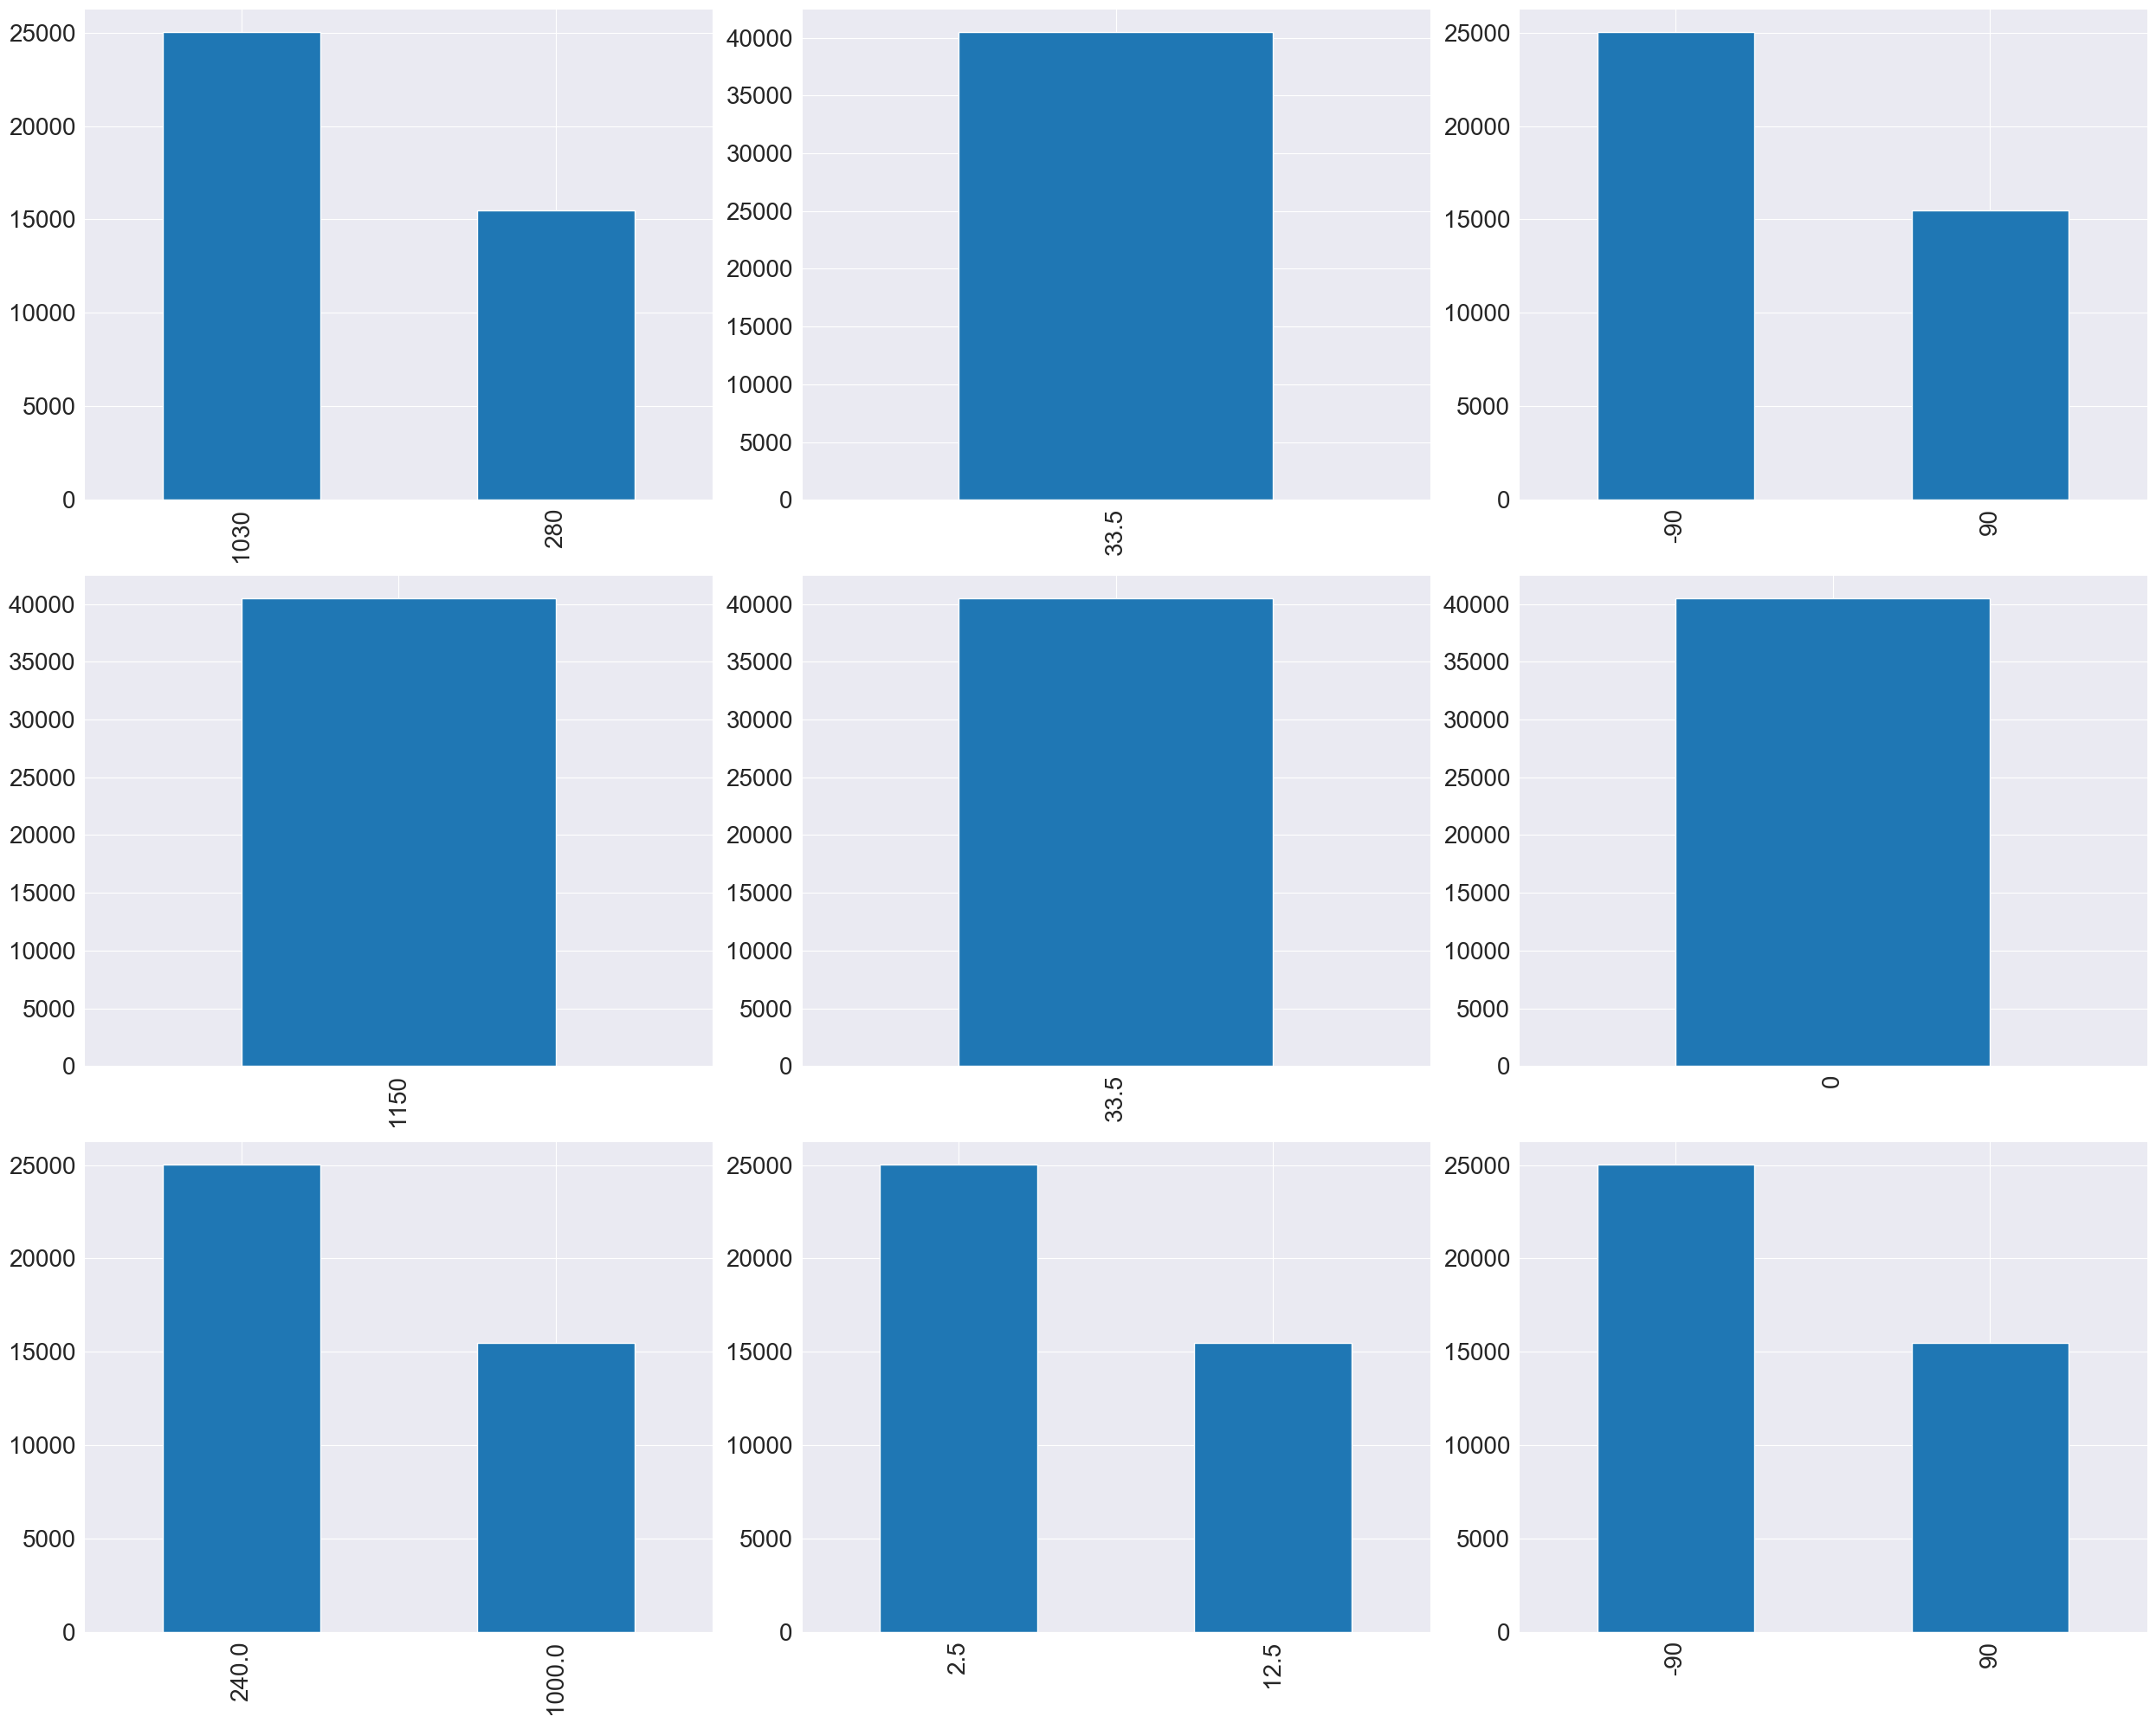

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))

df["CURE START POSITION X Collect Result_Dam"].value_counts().plot.bar(ax=axes[0, 0]);
df["CURE START POSITION Z Collect Result_Dam"].value_counts().plot.bar(ax=axes[0, 1]);
df["CURE START POSITION Θ Collect Result_Dam"].value_counts().plot.bar(ax=axes[0, 2]);

df["CURE STANDBY POSITION X Collect Result_Dam"].value_counts().plot.bar(ax=axes[1, 0]);
df["CURE STANDBY POSITION Z Collect Result_Dam"].value_counts().plot.bar(ax=axes[1, 1]);
df["CURE STANDBY POSITION Θ Collect Result_Dam"].value_counts().plot.bar(ax=axes[1, 2]);

df["CURE END POSITION X Collect Result_Dam"].value_counts().plot.bar(ax=axes[2, 0]);
df["CURE END POSITION Z Collect Result_Dam"].value_counts().plot.bar(ax=axes[2, 1]);
df["CURE END POSITION Θ Collect Result_Dam"].value_counts().plot.bar(ax=axes[2, 2]);

for ax in axes.flat:
    ax.tick_params(axis='both', which='major', labelsize=20)
 
plt.tight_layout();

In [51]:
df["CURE START POSITION Θ Collect Result_Dam"].equals(df["CURE END POSITION Θ Collect Result_Dam"])

True

In [52]:
df["CURE START POSITION Z Collect Result_Dam"].equals(df["CURE STANDBY POSITION Z Collect Result_Dam"])

True

In [53]:
# 중복값 행이므로 START POSITION만 남기고 삭제
df.drop(["CURE END POSITION Θ Collect Result_Dam", "CURE STANDBY POSITION Z Collect Result_Dam"], axis=1, inplace=True)

In [54]:
# 단일값이라 삭제
df.drop(["CURE START POSITION Z Collect Result_Dam",
         "CURE STANDBY POSITION X Collect Result_Dam",
         "CURE STANDBY POSITION Θ Collect Result_Dam"], axis=1, inplace=True)
# 150 entries

In [55]:
cure_position_dam_df = df.loc[:, df.columns.str.contains(r"^CURE.*POSITION.*_Dam$")]
cure_position_dam_unique_rows = cure_position_dam_df.drop_duplicates()
cure_position_dam_unique_rows

,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam
0,240.0,2.5,1030,-90
2,1000.0,12.5,280,90


In [56]:
cure_dam_df = df.loc[:, df.columns.str.contains(r"^CURE.*_Dam$")]
cure_dam_unique_rows = cure_dam_df.drop_duplicates()
cure_dam_unique_rows
# 같은 POSTION이더라도 SPEED가 달라지는 것을 확인할 수 있음

,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam
0,240.0,2.5,100,1030,-90
1,240.0,2.5,70,1030,-90
2,1000.0,12.5,85,280,90
3,1000.0,12.5,70,280,90
24,240.0,2.5,85,1030,-90
68,1000.0,12.5,100,280,90
69,240.0,2.5,95,1030,-90
70,240.0,2.5,105,1030,-90
167,1000.0,12.5,105,280,90
528,1000.0,12.5,95,280,90


#### DISCHARGED

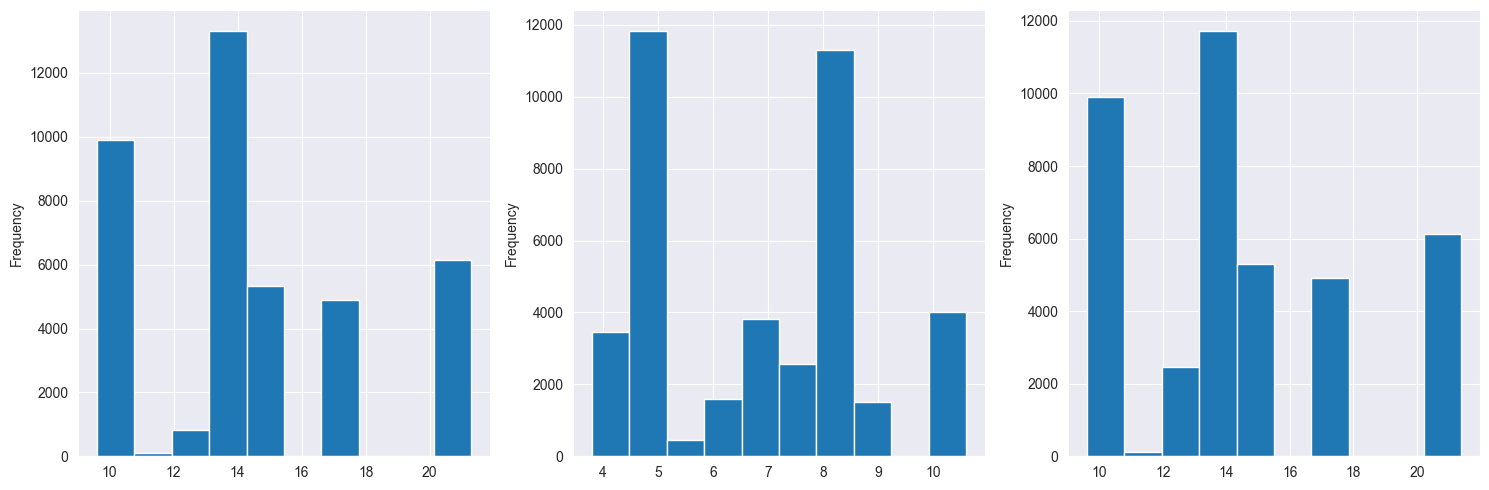

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam"].plot.hist(ax=axes[0]);
df["DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam"].plot.hist(ax=axes[1]);
df["DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam"].plot.hist(ax=axes[2]);

plt.tight_layout();

In [58]:
df["DISCHARGED SPEED OF RESIN Collect Result_Dam"].value_counts()

10    21046
16    19456
15        4
Name: DISCHARGED SPEED OF RESIN Collect Result_Dam, dtype: int64

In [59]:
df[df["DISCHARGED SPEED OF RESIN Collect Result_Dam"] == 15]["target"]

2398     AbNormal
13852      Normal
15148      Normal
40332      Normal
Name: target, dtype: object

In [60]:
discharged_time_df = df.loc[:, df.columns.str.contains(r"^DISCHARGED.*TIME.*_Dam$")]
discharged_time_df.corr()
# DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
# DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
# 상관관계가 거의 1에 가까움

,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,1.000000,0.619393,0.999476
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,0.619393,1.000000,0.614492
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,0.999476,0.614492,1.000000


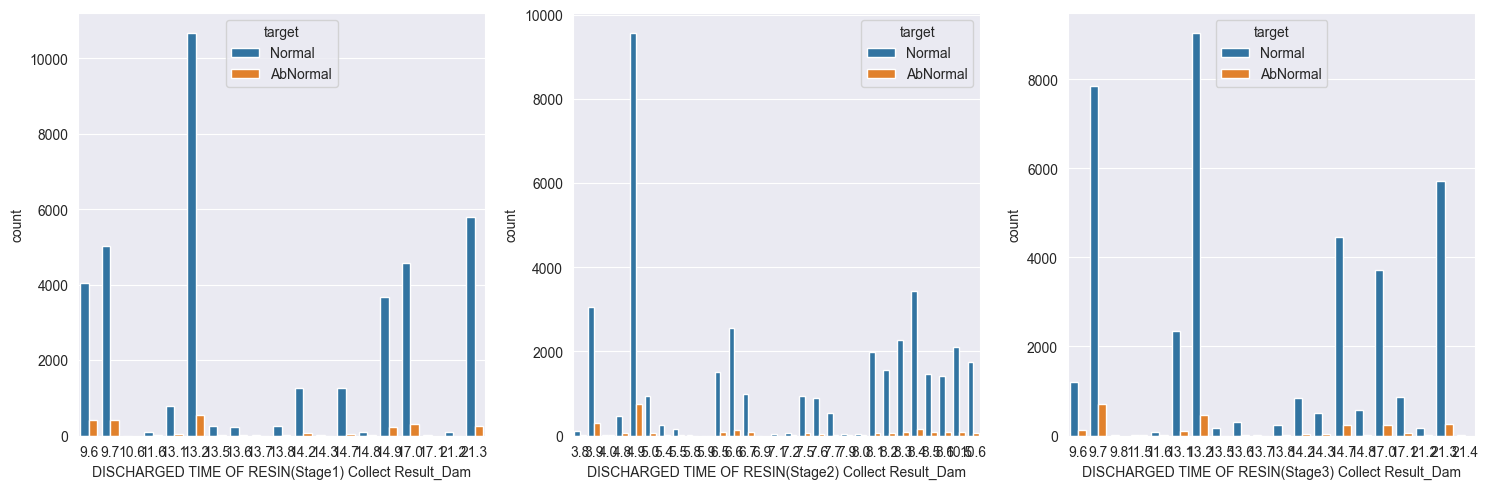

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam", hue="target", data=df, ax=axes[0]);
sns.countplot(x="DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam", hue="target", data=df, ax=axes[1]);
sns.countplot(x="DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

In [62]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["DISCHARGED TIME OF RESIN(Stage1) Collect Result Bins_Dam"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam"].values.reshape(-1,1))
df["DISCHARGED TIME OF RESIN(Stage2) Collect Result Bins_Dam"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam"].values.reshape(-1,1))
df["DISCHARGED TIME OF RESIN(Stage3) Collect Result Bins_Dam"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam"].values.reshape(-1,1))

# kb.bin_edges_

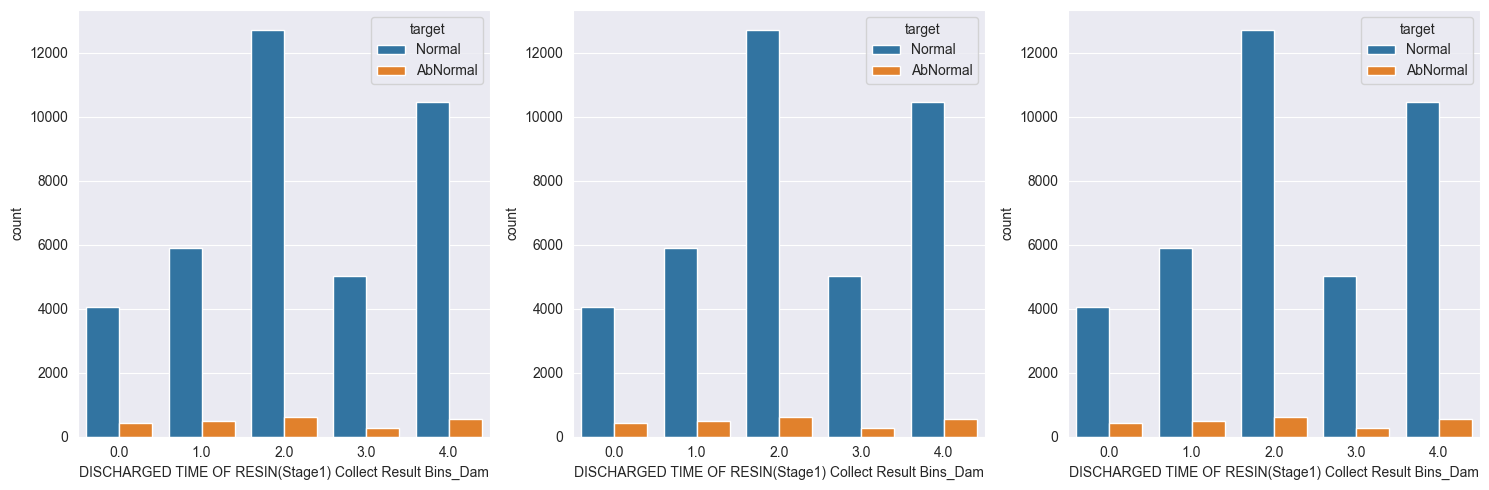

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="DISCHARGED TIME OF RESIN(Stage1) Collect Result Bins_Dam", hue="target", data=df, ax=axes[0]);
sns.countplot(x="DISCHARGED TIME OF RESIN(Stage1) Collect Result Bins_Dam", hue="target", data=df, ax=axes[1]);
sns.countplot(x="DISCHARGED TIME OF RESIN(Stage1) Collect Result Bins_Dam", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

#### Dispense

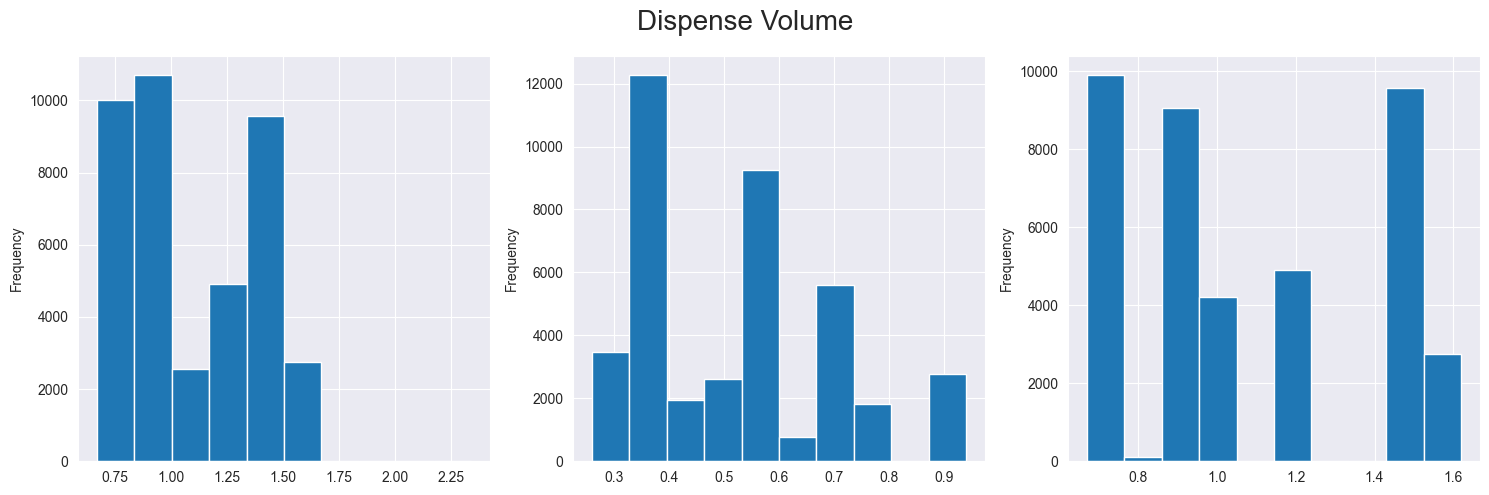

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df["Dispense Volume(Stage1) Collect Result_Dam"].plot.hist(ax=axes[0]);
df["Dispense Volume(Stage2) Collect Result_Dam"].plot.hist(ax=axes[1]);
df["Dispense Volume(Stage3) Collect Result_Dam"].plot.hist(ax=axes[2]);
plt.suptitle("Dispense Volume", size=20)
plt.tight_layout();

In [65]:
df["Dispense Volume(Stage1) Collect Result_Dam"].value_counts()

0.67    9901
0.92    8033
1.49    6046
1.19    4901
1.45    3181
1.04    1997
1.63    1907
0.99    1276
1.61     771
0.91     578
1.02     522
0.96     273
0.94     261
0.95     246
1.44     246
0.81     106
1.48      92
1.62      49
1.03      49
1.56      37
1.00      29
2.34       4
0.74       1
Name: Dispense Volume(Stage1) Collect Result_Dam, dtype: int64

In [66]:
dispense_df = df.loc[:, df.columns.str.contains(r"^Dispense.*_Dam$")]
dispense_df.corr()
# 각 열들 상관관계 높음

,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,Dispense Volume(Stage3) Collect Result_Dam
Dispense Volume(Stage1) Collect Result_Dam,1.000000,0.767858,0.999379
Dispense Volume(Stage2) Collect Result_Dam,0.767858,1.000000,0.764402
Dispense Volume(Stage3) Collect Result_Dam,0.999379,0.764402,1.000000


In [67]:
kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["Dispense Volume(Stage1) Collect Result Bins_Dam"] = kb.fit_transform(df["Dispense Volume(Stage1) Collect Result_Dam"].values.reshape(-1,1))
df["Dispense Volume(Stage2) Collect Result Bins_Dam"] = kb.fit_transform(df["Dispense Volume(Stage2) Collect Result_Dam"].values.reshape(-1,1))
df["Dispense Volume(Stage3) Collect Result Bins_Dam"] = kb.fit_transform(df["Dispense Volume(Stage3) Collect Result_Dam"].values.reshape(-1,1))

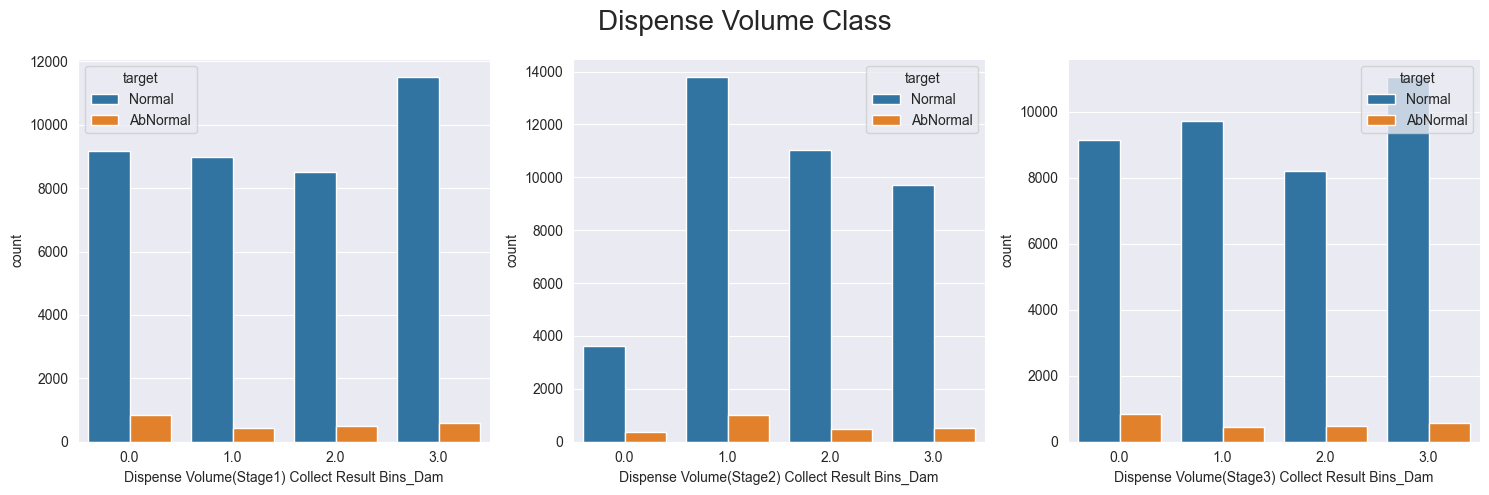

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="Dispense Volume(Stage1) Collect Result Bins_Dam", hue="target", data=df, ax=axes[0]);
sns.countplot(x="Dispense Volume(Stage2) Collect Result Bins_Dam", hue="target", data=df, ax=axes[1]);
sns.countplot(x="Dispense Volume(Stage3) Collect Result Bins_Dam", hue="target", data=df, ax=axes[2]);
plt.suptitle("Dispense Volume Class", size=20)
plt.tight_layout();

#### HEAD NORMAL

In [69]:
df["HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam"].value_counts()

377.5     8560
377.3     4307
552.0     4030
161.3     2416
553.6     2358
162.3     1920
551.7     1907
1269.0    1779
161.5     1763
160.8     1612
162.6     1465
553.4     1059
1271.3    1056
159.8      843
550.5      826
161.4      747
1271.8     745
553.1      547
551.0      489
162.9      446
160.3      446
161.2      256
552.9      243
553.2      217
162.2      126
162.1      102
552.3       67
552.6       46
553.0       38
552.4       38
554.0       26
162.5       20
552.7        3
553.7        1
161.9        1
552.2        1
Name: HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam, dtype: int64

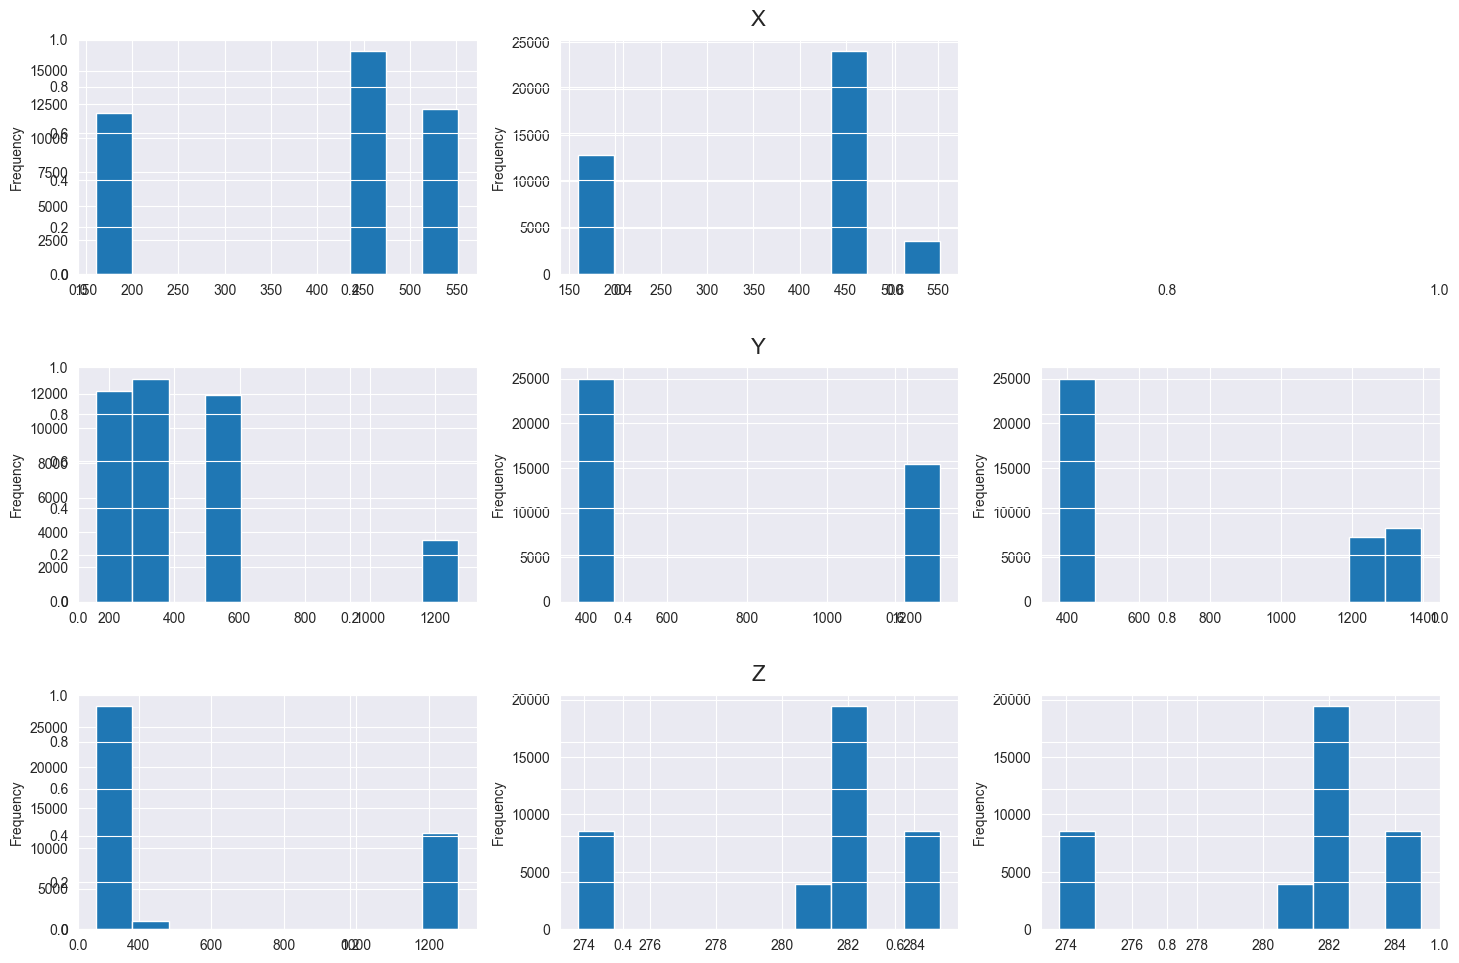

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))


df["HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam"].plot.hist(ax=axes[0, 0]);
df["HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam"].plot.hist(ax=axes[0, 1]);
axes[0, 2].remove()

df["HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam"].plot.hist(ax=axes[1, 0]);
df["HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam"].plot.hist(ax=axes[1, 1]);
df["HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam"].plot.hist(ax=axes[1, 2]);

df["HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam"].plot.hist(ax=axes[2, 0]);
df["HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam"].plot.hist(ax=axes[2, 1]);
df["HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam"].plot.hist(ax=axes[2, 2]);

fig.add_subplot(311, frame_on=False)
plt.title("X", fontsize=16, pad=10)

fig.add_subplot(312, frame_on=False)
plt.title("Y", fontsize=16, pad=10)

fig.add_subplot(313, frame_on=False)
plt.title("Z", fontsize=16, pad=10)

plt.tight_layout();

In [71]:
kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam"].values.reshape(-1,1))


df["HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam"].values.reshape(-1,1))

df["HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam"].values.reshape(-1,1))

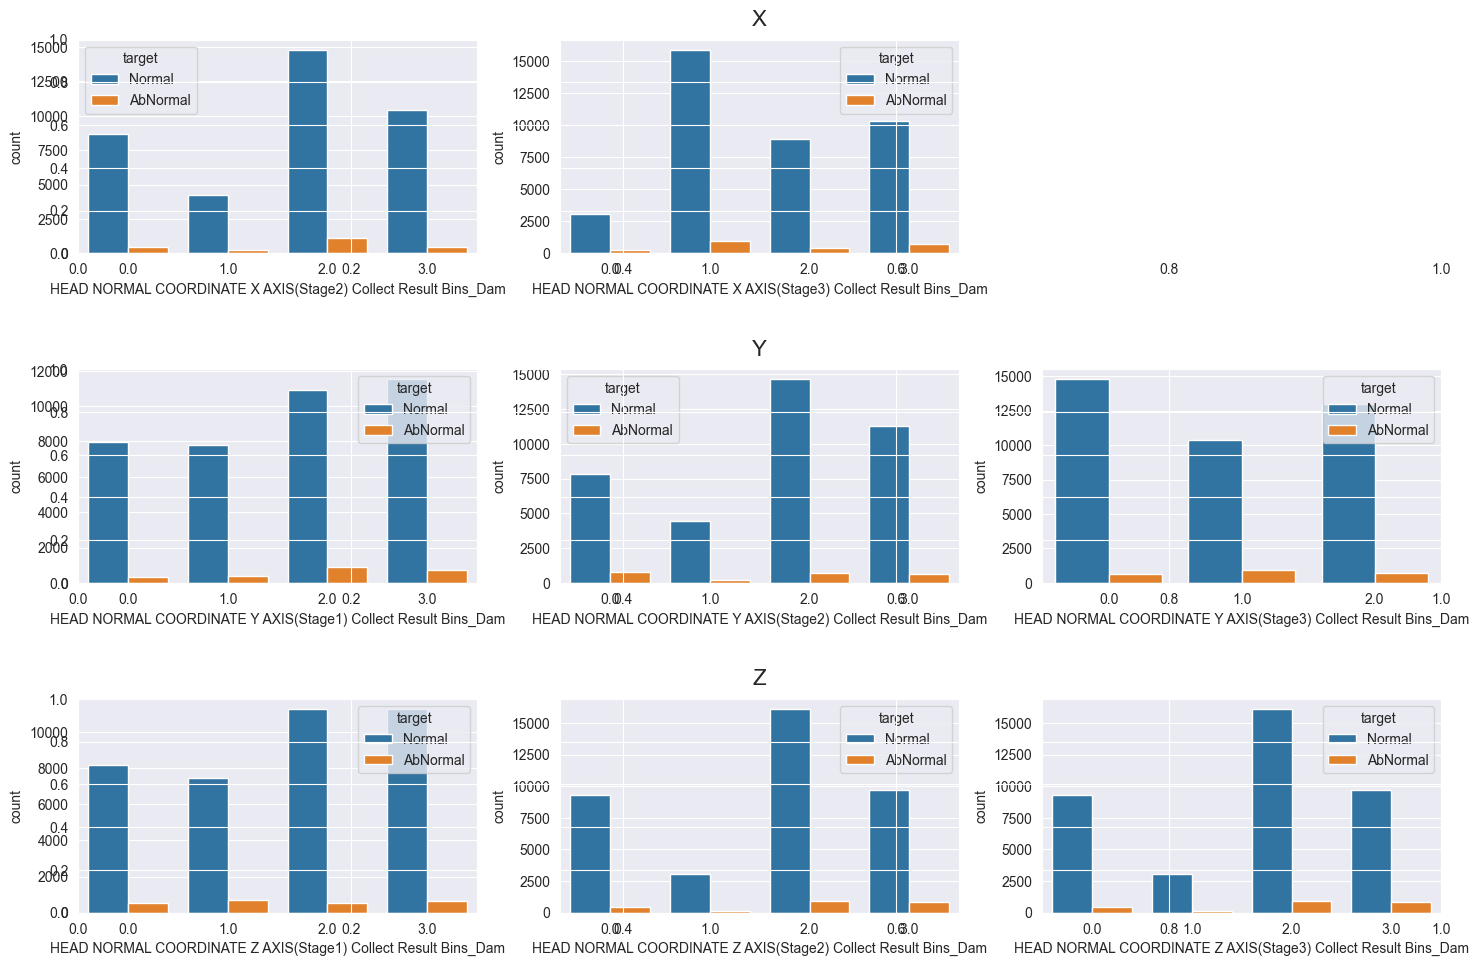

In [72]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

sns.countplot(x="HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result Bins_Dam", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result Bins_Dam", hue="target", data=df, ax=axes[0, 1]);
axes[0, 2].remove()

sns.countplot(x="HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result Bins_Dam", hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x="HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result Bins_Dam", hue="target", data=df, ax=axes[1, 1]);
sns.countplot(x="HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result Bins_Dam", hue="target", data=df, ax=axes[1, 2]);

sns.countplot(x="HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result Bins_Dam", hue="target", data=df, ax=axes[2,0]);
sns.countplot(x="HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result Bins_Dam", hue="target", data=df, ax=axes[2,1]);
sns.countplot(x="HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result Bins_Dam", hue="target", data=df, ax=axes[2,2]);

fig.add_subplot(311, frame_on=False)
plt.title("X", fontsize=16, pad=10)

fig.add_subplot(312, frame_on=False)
plt.title("Y", fontsize=16, pad=10)

fig.add_subplot(313, frame_on=False)
plt.title("Z", fontsize=16, pad=10)

plt.tight_layout();

#### HEAD Standby

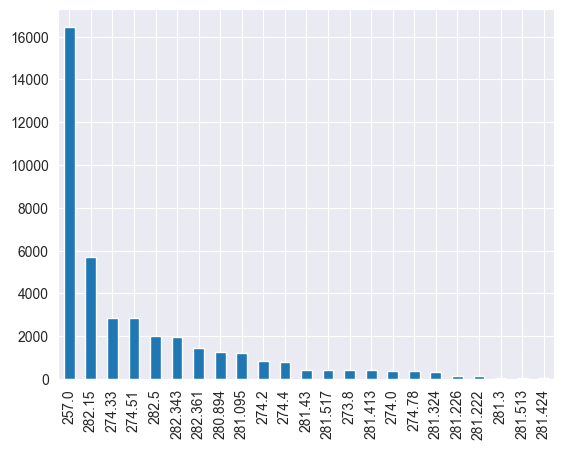

In [73]:
df["HEAD Standby Position X Collect Result_Dam"].value_counts().plot.bar();

<AxesSubplot:ylabel='Frequency'>

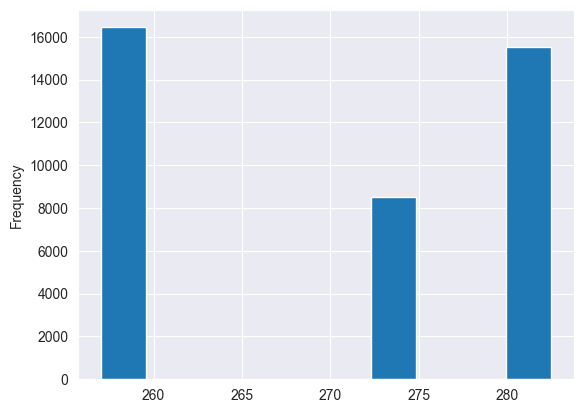

In [74]:
df["HEAD Standby Position X Collect Result_Dam"].plot.hist()

In [75]:
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans', random_state=RANDOM_SEED)
# 여기서는 Kmeans 사용함

df["HEAD Standby Position X Collect Result Bins_Dam"] = kb.fit_transform(df["HEAD Standby Position X Collect Result_Dam"].values.reshape(-1,1))

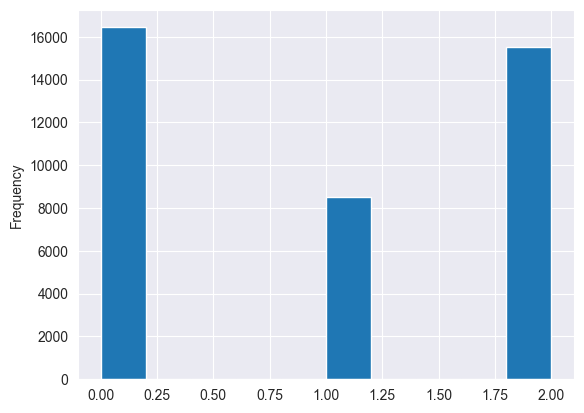

In [76]:
df["HEAD Standby Position X Collect Result Bins_Dam"].plot.hist();

In [77]:
df[["HEAD Standby Position Y Collect Result_Dam", "target"]].value_counts()

HEAD Standby Position Y Collect Result_Dam  target  
257                                         Normal      22915
66                                          Normal      15241
                                            AbNormal     1206
257                                         AbNormal     1144
dtype: int64

In [78]:
df[["HEAD Standby Position Z Collect Result_Dam", "target"]].value_counts()

HEAD Standby Position Z Collect Result_Dam  target  
66                                          Normal      22915
0                                           Normal      15241
                                            AbNormal     1206
66                                          AbNormal     1144
dtype: int64

In [79]:
df[["HEAD Standby Position Y Collect Result_Dam", "HEAD Standby Position Z Collect Result_Dam"]].corr()

,HEAD Standby Position Y Collect Result_Dam,HEAD Standby Position Z Collect Result_Dam
HEAD Standby Position Y Collect Result_Dam,1.0,1.0
HEAD Standby Position Z Collect Result_Dam,1.0,1.0


#### HEAD Clean

In [80]:
df["Head Clean Position X Collect Result_Dam"].value_counts()

0.0      24059
127.5    16447
Name: Head Clean Position X Collect Result_Dam, dtype: int64

In [81]:
df["Head Clean Position Y Collect Result_Dam"].value_counts()

127.5    24059
66.0     16447
Name: Head Clean Position Y Collect Result_Dam, dtype: int64

In [82]:
df["Head Clean Position Z Collect Result_Dam"].value_counts()

66.00     24059
133.50     8231
130.85     7885
124.50      331
Name: Head Clean Position Z Collect Result_Dam, dtype: int64

In [83]:
filtered_df = df[
    (df["Head Clean Position X Collect Result_Dam"] == 0.0) &
    (df["Head Clean Position Y Collect Result_Dam"] == 127.5) &
    (df["Head Clean Position Z Collect Result_Dam"] == 66.0)
]
len(filtered_df)

24059

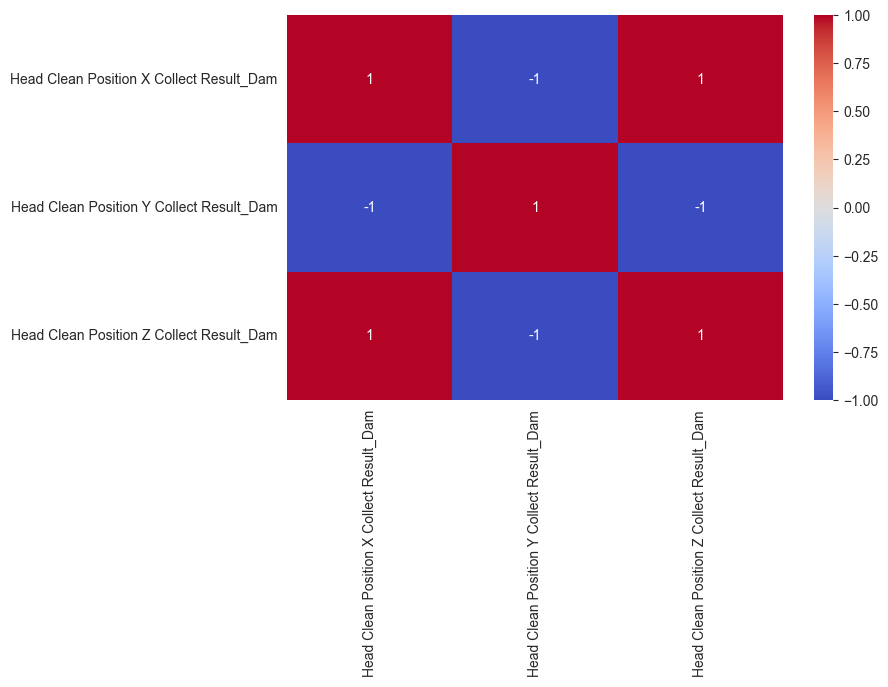

In [84]:
head_clean_df = df.loc[:, df.columns.str.contains(r"^Head Clean.*_Dam$")]

plt.figure(figsize=(8, 5))
sns.heatmap(head_clean_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

In [85]:
head_clean_df.corr()

,Head Clean Position X Collect Result_Dam,Head Clean Position Y Collect Result_Dam,Head Clean Position Z Collect Result_Dam
Head Clean Position X Collect Result_Dam,1.000000,-1.000000,0.999443
Head Clean Position Y Collect Result_Dam,-1.000000,1.000000,-0.999443
Head Clean Position Z Collect Result_Dam,0.999443,-0.999443,1.000000


In [86]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA


# scaler = StandardScaler()
# scaled = scaler.fit_transform(head_clean_df)

# # PCA 적용
# pca = PCA(n_components=1)
# pca_comp = pca.fit_transform(scaled)
# # df["Head Clean Position Collect Result PCA_Dam"] = pca_comp

#### Head Purge

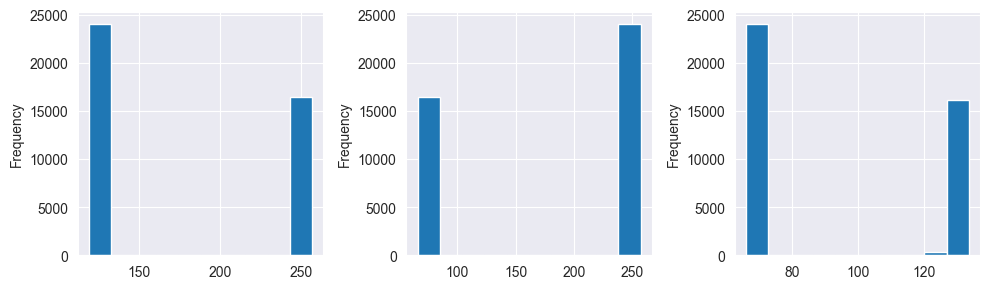

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

df["Head Purge Position X Collect Result_Dam"].plot.hist(ax=axes[0]);
df["Head Purge Position Y Collect Result_Dam"].plot.hist(ax=axes[1]);
df["Head Purge Position Z Collect Result_Dam"].plot.hist(ax=axes[2]);

plt.tight_layout();

In [88]:
df[["Head Purge Position X Collect Result_Dam", "target"]].value_counts()

Head Purge Position X Collect Result_Dam  target  
257.00                                    Normal      15241
130.85                                    Normal      14792
124.00                                    Normal       8090
257.00                                    AbNormal     1206
130.85                                    AbNormal      741
124.00                                    AbNormal      403
118.85                                    Normal         33
dtype: int64

In [89]:
df[["Head Purge Position Y Collect Result_Dam", "target"]].value_counts()

Head Purge Position Y Collect Result_Dam  target  
257                                       Normal      22915
66                                        Normal      15241
                                          AbNormal     1206
257                                       AbNormal     1144
dtype: int64

In [90]:
df[["Head Purge Position Z Collect Result_Dam", "target"]].value_counts()

Head Purge Position Z Collect Result_Dam  target  
66.00                                     Normal      22915
133.50                                    Normal       7510
130.85                                    Normal       7428
66.00                                     AbNormal     1144
133.50                                    AbNormal      736
130.85                                    AbNormal      442
124.50                                    Normal        303
                                          AbNormal       28
dtype: int64

#### Head Zero

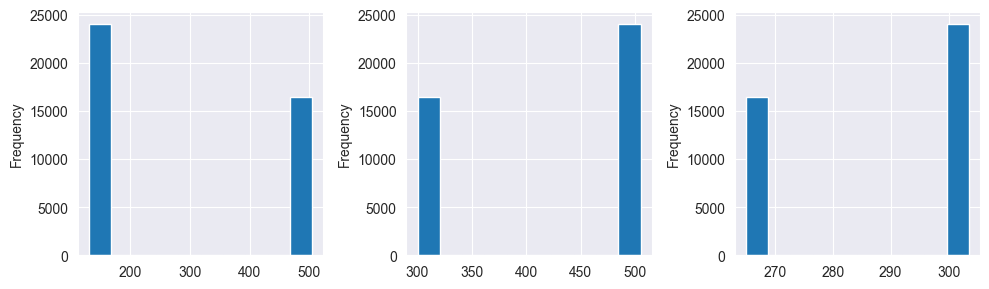

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

df["Head Zero Position X Collect Result_Dam"].plot.hist(ax=axes[0]);
df["Head Zero Position Y Collect Result_Dam"].plot.hist(ax=axes[1]);
df["Head Zero Position Z Collect Result_Dam"].plot.hist(ax=axes[2]);

plt.tight_layout();

In [92]:
df[["Head Zero Position Y Collect Result_Dam", "Head Zero Position Z Collect Result_Dam", "Head Purge Position Y Collect Result_Dam"]].corr()

,Head Zero Position Y Collect Result_Dam,Head Zero Position Z Collect Result_Dam,Head Purge Position Y Collect Result_Dam
Head Zero Position Y Collect Result_Dam,1.000000,0.999917,0.999949
Head Zero Position Z Collect Result_Dam,0.999917,1.000000,0.999967
Head Purge Position Y Collect Result_Dam,0.999949,0.999967,1.000000


In [93]:
df[["Head Zero Position X Collect Result_Dam", "target"]].value_counts()

Head Zero Position X Collect Result_Dam  target  
130.85                                   Normal      22915
505.00                                   Normal      15241
                                         AbNormal     1206
130.85                                   AbNormal     1144
dtype: int64

In [94]:
df[["Head Zero Position Y Collect Result_Dam", "target"]].value_counts()

Head Zero Position Y Collect Result_Dam  target  
505.0                                    Normal      22915
300.0                                    Normal      10987
303.5                                    Normal       4254
505.0                                    AbNormal     1144
300.0                                    AbNormal      767
303.5                                    AbNormal      439
dtype: int64

In [95]:
df[["Head Zero Position Z Collect Result_Dam", "target"]].value_counts()

Head Zero Position Z Collect Result_Dam  target  
300.0                                    Normal      22894
265.0                                    Normal      15241
                                         AbNormal     1206
300.0                                    AbNormal     1101
303.5                                    AbNormal       43
                                         Normal         21
dtype: int64

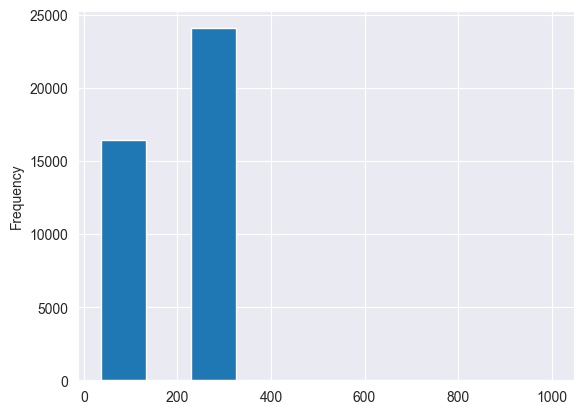

In [96]:
df["Machine Tact time Collect Result_Dam"].plot.hist();

In [97]:
df["Machine Tact time Collect Result_Dam"].describe()

count    40506.000000
mean       188.889714
std         92.788947
min         35.500000
25%         88.400000
50%        265.000000
75%        265.020000
max        999.900000
Name: Machine Tact time Collect Result_Dam, dtype: float64

In [98]:
df["Machine Tact time Collect Result_Dam"].value_counts()

265.02    15247
265.00     8812
92.20      1580
88.30      1291
88.40      1240
          ...  
92.50         1
78.60         1
35.50         1
157.20        1
99.60         1
Name: Machine Tact time Collect Result_Dam, Length: 266, dtype: int64

In [99]:
kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["Machine Tact time Collect Result Bins_Dam"] = kb.fit_transform(df["Machine Tact time Collect Result_Dam"].values.reshape(-1,1))

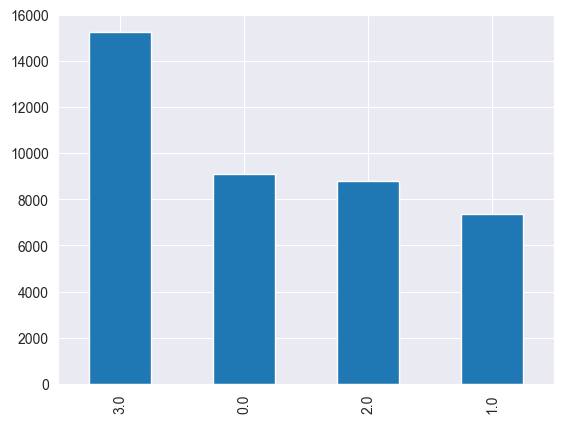

In [100]:
df["Machine Tact time Collect Result Bins_Dam"].value_counts().plot.bar();

In [101]:
kb.bin_edges_

array([array([ 35.5 ,  88.4 , 265.  , 265.02, 999.9 ])], dtype=object)

In [102]:
df["PalletID Collect Result_Dam"].value_counts()

4.0      1656
1.0      1626
3.0      1625
2.0      1620
7.0      1599
         ... 
111.7       1
362.3       1
95.7        1
79.8        1
110.5       1
Name: PalletID Collect Result_Dam, Length: 374, dtype: int64

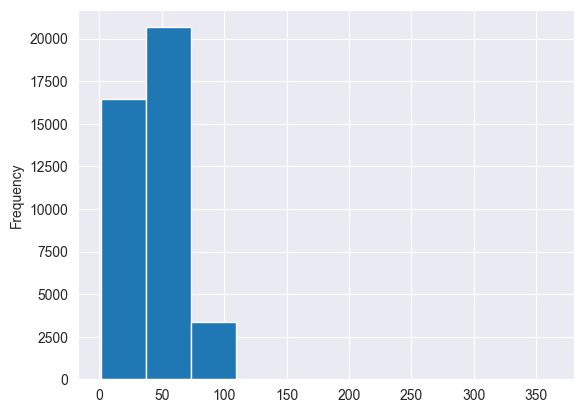

In [103]:
df["PalletID Collect Result_Dam"].plot.hist();

In [104]:
df["PalletID Collect Result_Dam"].describe()

count    40506.000000
mean        40.258789
std         29.204686
min          1.000000
25%          7.000000
50%         54.500000
75%         65.900000
max        362.300000
Name: PalletID Collect Result_Dam, dtype: float64

In [105]:
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["PalletID Collect Result Bins_Dam"] = kb.fit_transform(df["PalletID Collect Result_Dam"].values.reshape(-1,1))

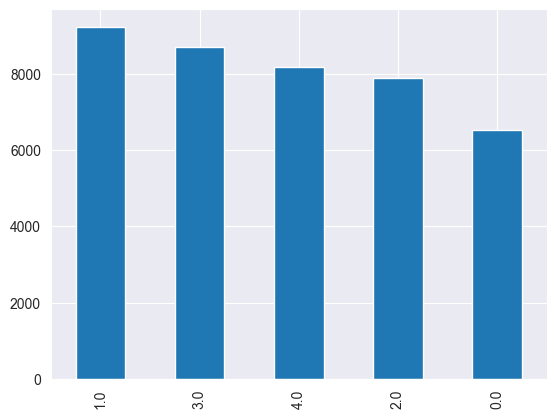

In [106]:
df["PalletID Collect Result Bins_Dam"].value_counts().plot.bar();

In [107]:
kb.bin_edges_

array([array([  1. ,   5. ,  15. ,  57. ,  71.1, 362.3])], dtype=object)

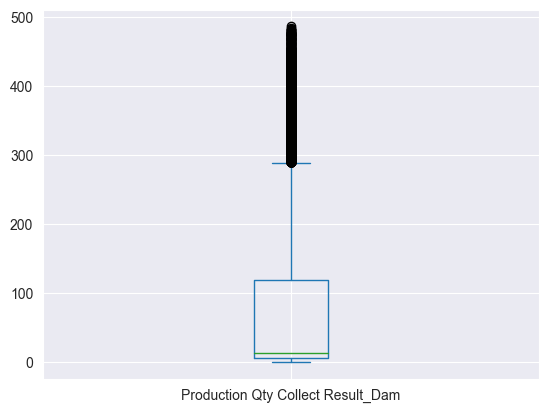

In [108]:
df["Production Qty Collect Result_Dam"].plot.box();

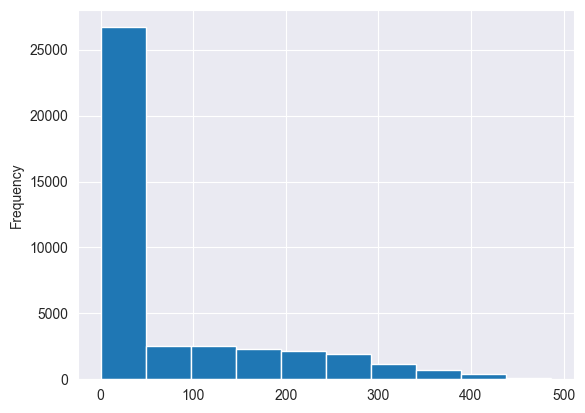

In [109]:
df["Production Qty Collect Result_Dam"].plot.hist();

In [110]:
df["Production Qty Collect Result_Dam"].value_counts()

6      1608
16     1604
3      1599
12     1581
8      1574
       ... 
460       1
483       1
480       1
485       1
472       1
Name: Production Qty Collect Result_Dam, Length: 486, dtype: int64

In [111]:
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["Production Qty Collect Result Bins_Dam"] = kb.fit_transform(df["Production Qty Collect Result_Dam"].values.reshape(-1,1))

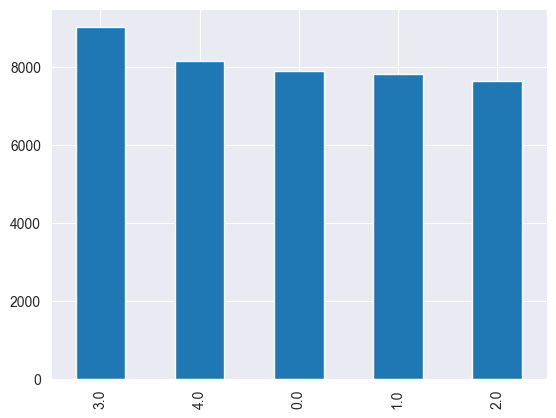

In [112]:
df["Production Qty Collect Result Bins_Dam"].value_counts().plot.bar();

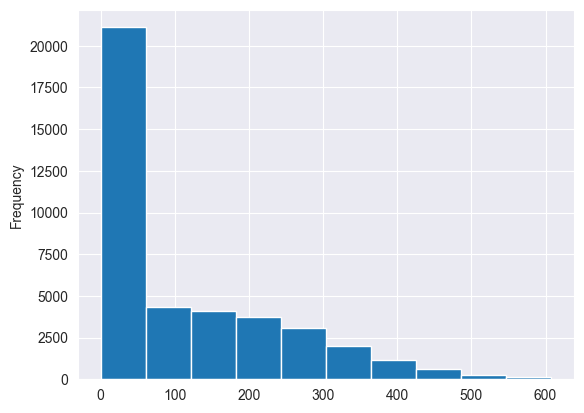

In [113]:
df["Receip No Collect Result_Dam"].plot.hist();

In [114]:
df["Receip No Collect Result_Dam"].describe()

count    40506.000000
mean       108.663260
std        130.746962
min          0.000000
25%          1.000000
50%         49.000000
75%        196.000000
max        608.000000
Name: Receip No Collect Result_Dam, dtype: float64

In [115]:
kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans', random_state=RANDOM_SEED)

df["Receip No Collect Result Bins_Dam"] = kb.fit_transform(df["Receip No Collect Result_Dam"].values.reshape(-1,1))

In [116]:
df[["Receip No Collect Result Bins_Dam", "target"]].value_counts()

Receip No Collect Result Bins_Dam  target  
0.0                                Normal      20286
1.0                                Normal       8079
2.0                                Normal       6821
3.0                                Normal       2970
0.0                                AbNormal     1547
1.0                                AbNormal      384
2.0                                AbNormal      287
3.0                                AbNormal      132
dtype: int64

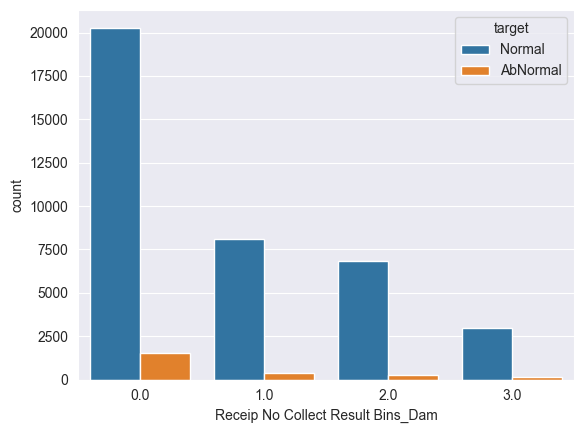

In [117]:
sns.countplot(x="Receip No Collect Result Bins_Dam", hue="target", data=df);

#### Stage1 ~ 3 Circle1~4

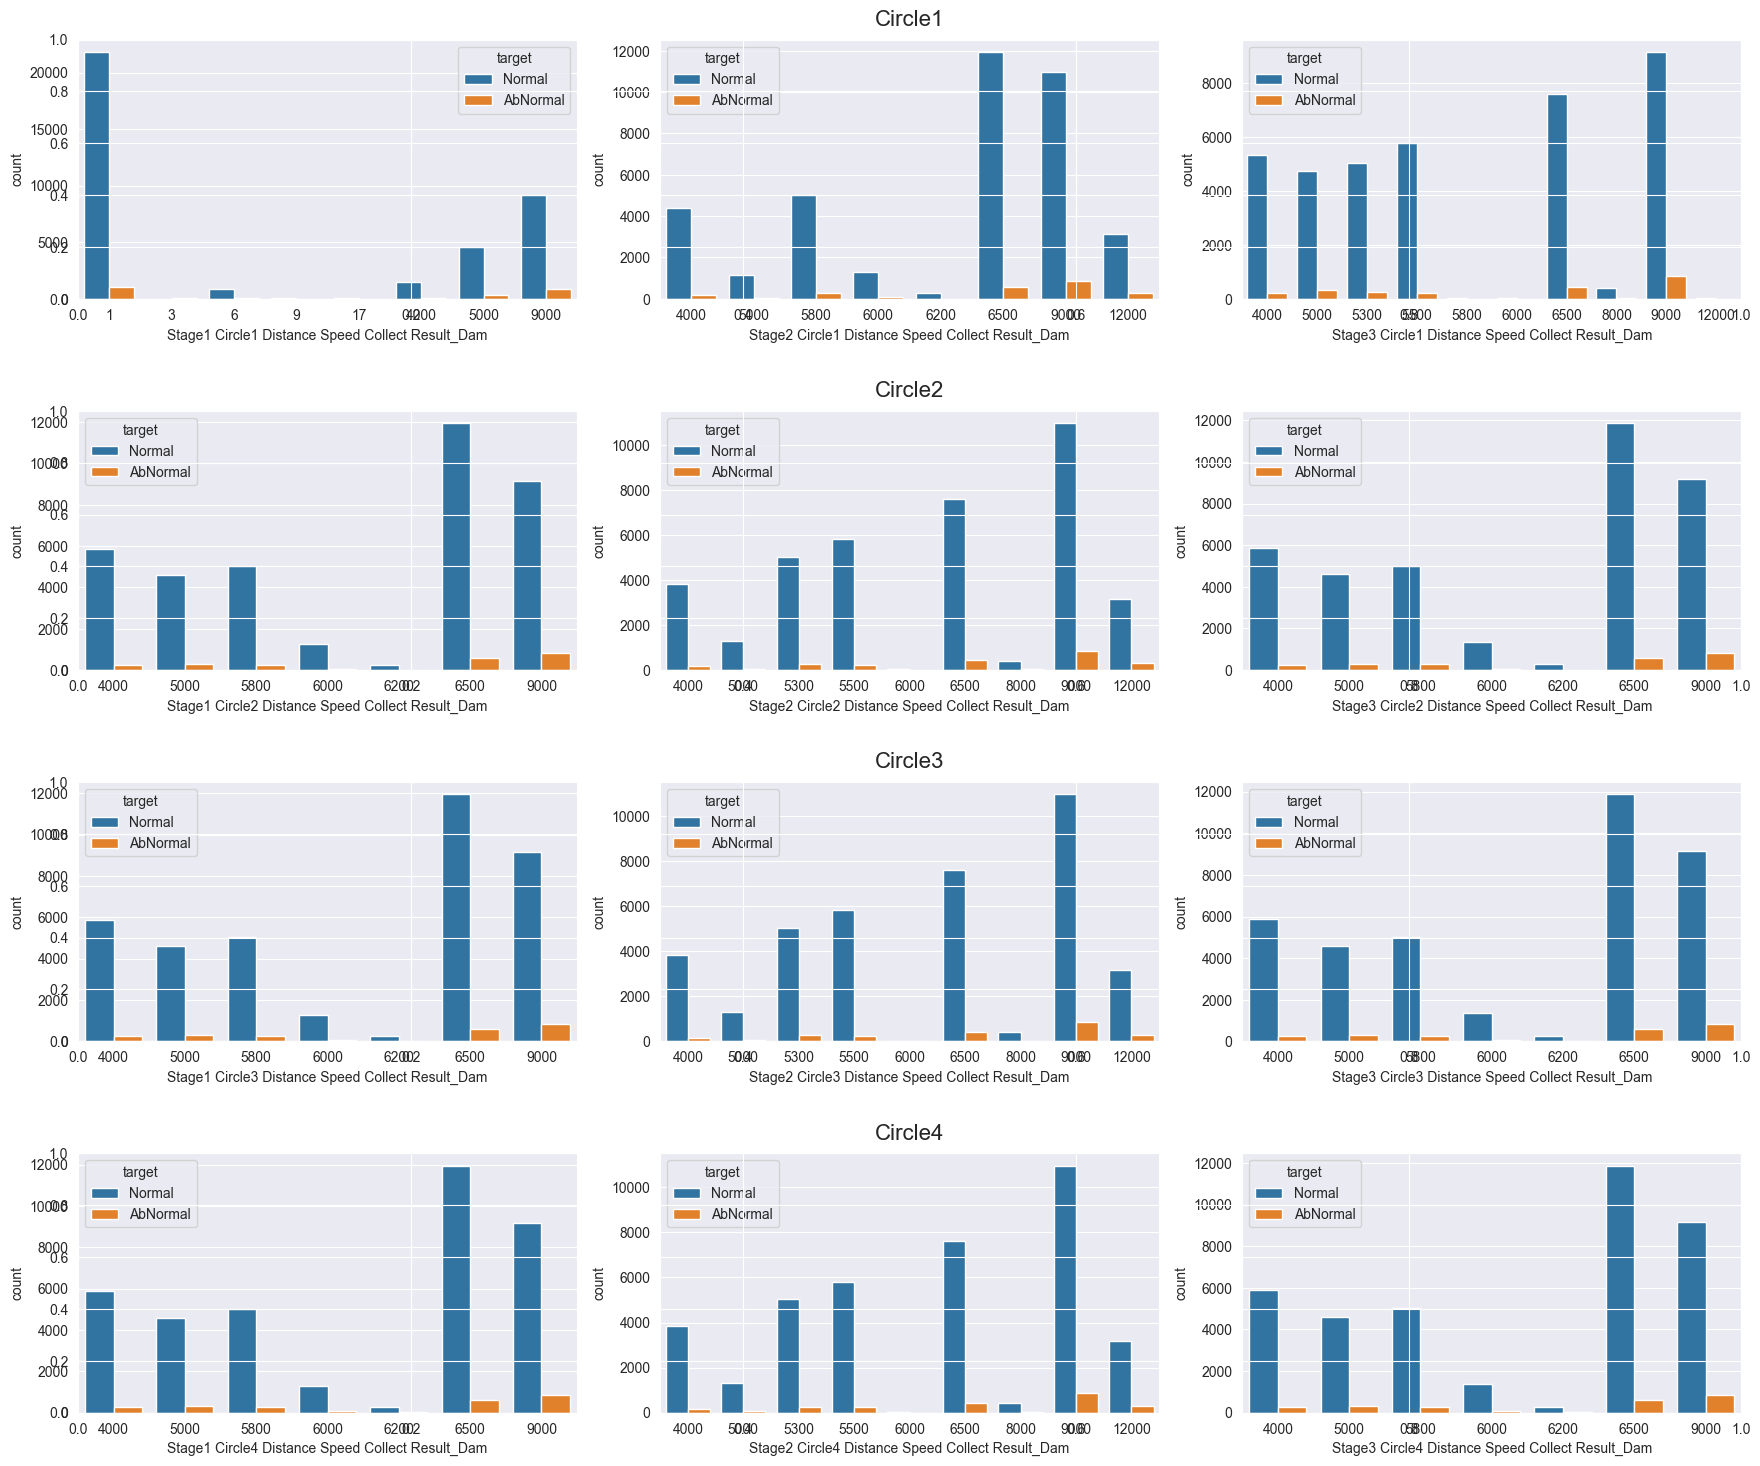

In [118]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))

sns.countplot(x="Stage1 Circle1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="Stage2 Circle1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x="Stage3 Circle1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 2]);

sns.countplot(x="Stage1 Circle2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x="Stage2 Circle2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 1]);
sns.countplot(x="Stage3 Circle2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 2]);

sns.countplot(x="Stage1 Circle3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 0]);
sns.countplot(x="Stage2 Circle3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 1]);
sns.countplot(x="Stage3 Circle3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 2]);

sns.countplot(x="Stage1 Circle4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 0]);
sns.countplot(x="Stage2 Circle4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 1]);
sns.countplot(x="Stage3 Circle4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 2]);

fig.add_subplot(411, frame_on=False)
plt.title("Circle1", fontsize=16, pad=10)

fig.add_subplot(412, frame_on=False)
plt.title("Circle2", fontsize=16, pad=10)

fig.add_subplot(413, frame_on=False)
plt.title("Circle3", fontsize=16, pad=10)

fig.add_subplot(414, frame_on=False)
plt.title("Circle4", fontsize=16, pad=10)


plt.tight_layout();

In [119]:
circle2_dam_df = df[["Stage1 Circle2 Distance Speed Collect Result_Dam",
                     "Stage2 Circle2 Distance Speed Collect Result_Dam",
                     "Stage3 Circle2 Distance Speed Collect Result_Dam"]]

circle3_dam_df = df[["Stage1 Circle3 Distance Speed Collect Result_Dam",
                     "Stage2 Circle3 Distance Speed Collect Result_Dam",
                     "Stage3 Circle3 Distance Speed Collect Result_Dam"]]

circle4_dam_df = df[["Stage1 Circle4 Distance Speed Collect Result_Dam",
                     "Stage2 Circle4 Distance Speed Collect Result_Dam",
                     "Stage3 Circle4 Distance Speed Collect Result_Dam"]]

In [120]:
circle2_dam_df.equals(circle3_dam_df)

False

In [121]:
circle2_dam_df.equals(circle4_dam_df)

False

In [122]:
circle2_3_dam =  ["Stage1 Circle3 Distance Speed Collect Result_Dam",
             "Stage2 Circle3 Distance Speed Collect Result_Dam",
             "Stage3 Circle3 Distance Speed Collect Result_Dam",
             "Stage1 Circle4 Distance Speed Collect Result_Dam",
             "Stage2 Circle4 Distance Speed Collect Result_Dam",
             "Stage3 Circle4 Distance Speed Collect Result_Dam"]

df.drop(circle2_3_dam, axis=1, inplace=True)

#### Stage1 ~ 3 Line1~4

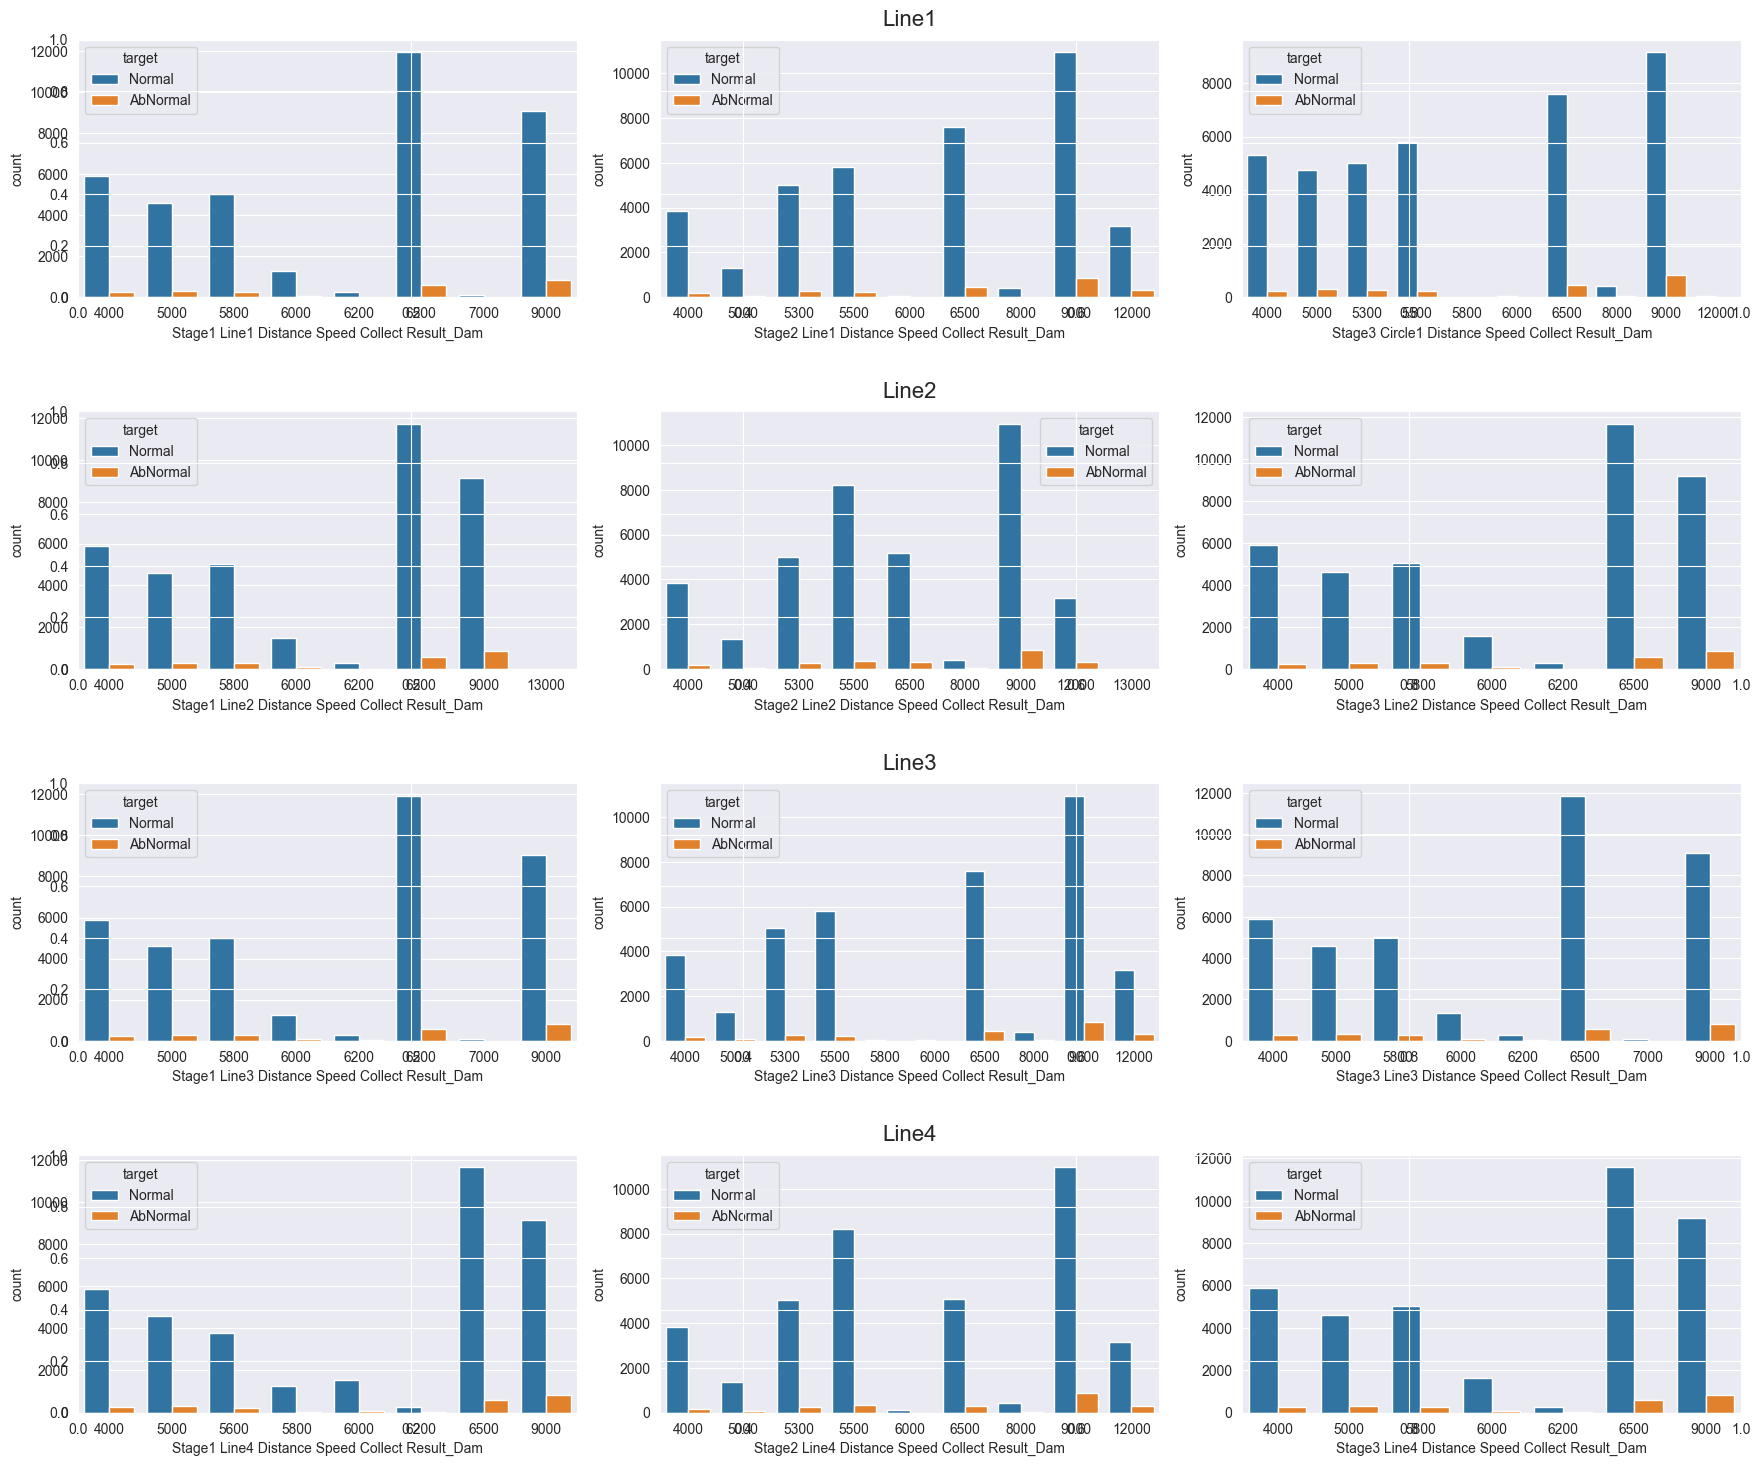

In [123]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))

sns.countplot(x="Stage1 Line1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="Stage2 Line1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x="Stage3 Circle1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 2]);

sns.countplot(x="Stage1 Line2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x="Stage2 Line2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 1]);
sns.countplot(x="Stage3 Line2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 2]);

sns.countplot(x="Stage1 Line3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 0]);
sns.countplot(x="Stage2 Line3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 1]);
sns.countplot(x="Stage3 Line3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 2]);

sns.countplot(x="Stage1 Line4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 0]);
sns.countplot(x="Stage2 Line4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 1]);
sns.countplot(x="Stage3 Line4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 2]);

fig.add_subplot(411, frame_on=False)
plt.title("Line1", fontsize=16, pad=10)

fig.add_subplot(412, frame_on=False)
plt.title("Line2", fontsize=16, pad=10)

fig.add_subplot(413, frame_on=False)
plt.title("Line3", fontsize=16, pad=10)

fig.add_subplot(414, frame_on=False)
plt.title("Line4", fontsize=16, pad=10)


plt.tight_layout();

In [124]:
# Stage별로 비슷해서 Stage끼리 묶음
stage1_line_dam = df[["Stage1 Line1 Distance Speed Collect Result_Dam",
                      "Stage1 Line2 Distance Speed Collect Result_Dam",
                      "Stage1 Line3 Distance Speed Collect Result_Dam",
                      "Stage1 Line4 Distance Speed Collect Result_Dam"]]

stage2_line_dam = df[["Stage2 Line1 Distance Speed Collect Result_Dam",
                      "Stage2 Line2 Distance Speed Collect Result_Dam",
                      "Stage2 Line3 Distance Speed Collect Result_Dam",
                      "Stage2 Line4 Distance Speed Collect Result_Dam"]]

stage3_line_dam = df[["Stage3 Line1 Distance Speed Collect Result_Dam",
                      "Stage3 Line2 Distance Speed Collect Result_Dam",
                      "Stage3 Line3 Distance Speed Collect Result_Dam",
                      "Stage3 Line4 Distance Speed Collect Result_Dam"]]


df["Mean Stage1 Line Distance Speed Collect Result_Dam"] = stage1_line_dam.apply("mean", axis=1).astype('int64')
df["Mean Stage2 Line Distance Speed Collect Result_Dam"] = stage2_line_dam.apply("mean", axis=1).astype('int64')
df["Mean Stage3 Line Distance Speed Collect Result_Dam"] = stage3_line_dam.apply("mean", axis=1).astype('int64')

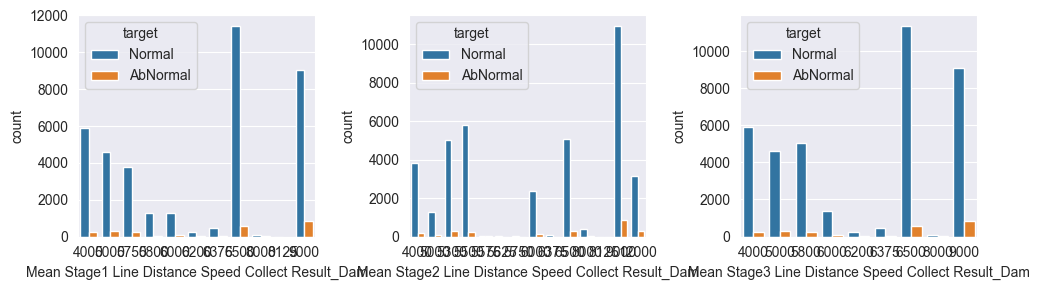

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

sns.countplot(x="Mean Stage1 Line Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0]);
sns.countplot(x="Mean Stage2 Line Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1]);
sns.countplot(x="Mean Stage3 Line Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

#### THICKNESS

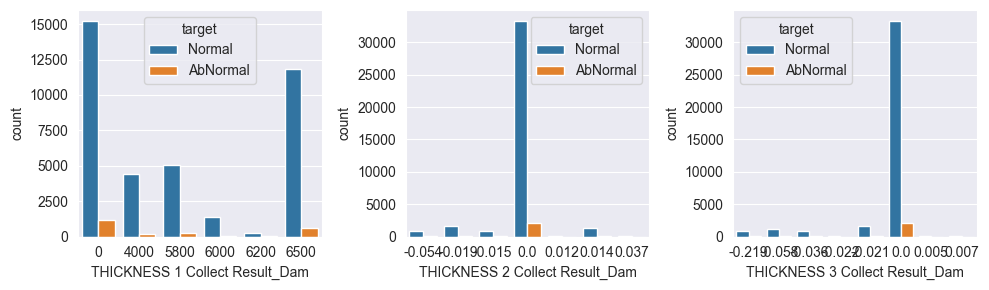

In [126]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

sns.countplot(x="THICKNESS 1 Collect Result_Dam", hue="target", data=df, ax=axes[0]);
sns.countplot(x="THICKNESS 2 Collect Result_Dam", hue="target", data=df, ax=axes[1]);
sns.countplot(x="THICKNESS 3 Collect Result_Dam", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

<AxesSubplot:>

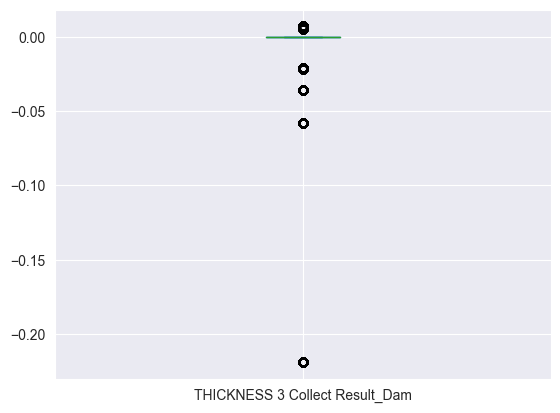

In [127]:
df["THICKNESS 3 Collect Result_Dam"].plot.box()

In [128]:
df["THICKNESS 3 Collect Result_Dam"].value_counts()

 0.000    35419
-0.021     1649
-0.058     1197
-0.036      964
-0.219      884
 0.007      150
-0.022      125
 0.005      118
Name: THICKNESS 3 Collect Result_Dam, dtype: int64

In [129]:
df["THICKNESS 3 Collect Result_Dam"].describe()

count    40506.000000
mean        -0.008232
std          0.033599
min         -0.219000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.007000
Name: THICKNESS 3 Collect Result_Dam, dtype: float64

### Fill1

In [130]:
df_fill1 = df.loc[:, df.columns.str.contains("_Fill1")]
df_fill1.head(3).T

,0,1,2
Equipment_Fill1,1,1,2
DISCHARGED SPEED OF RESIN Collect Result_Fill1,10.6,10.6,10.6
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1,12.7,13.5,13.5
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1,3.6,3.6,3.5
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1,12.6,13.5,13.4
Dispense Volume(Stage1) Collect Result_Fill1,12.06,12.82,12.82
Dispense Volume(Stage2) Collect Result_Fill1,3.42,3.42,3.32
Dispense Volume(Stage3) Collect Result_Fill1,11.97,12.82,12.73
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1,838.4,458.5,837.9
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1,458.7,157.0,458.1


In [131]:
df_fill1.describe()

,DISCHARGED SPEED OF RESIN Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1,Dispense Volume(Stage1) Collect Result_Fill1,Dispense Volume(Stage2) Collect Result_Fill1,Dispense Volume(Stage3) Collect Result_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1,HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1,HEAD Standby Position X Collect Result_Fill1,HEAD Standby Position Y Collect Result_Fill1,HEAD Standby Position Z Collect Result_Fill1,Head Clean Position X Collect Result_Fill1,Head Clean Position Y Collect Result_Fill1,Head Clean Position Z Collect Result_Fill1,Head Purge Position X Collect Result_Fill1,Head Purge Position Y Collect Result_Fill1,Head Purge Position Z Collect Result_Fill1,Machine Tact time Collect Result_Fill1,PalletID Collect Result_Fill1,Production Qty Collect Result_Fill1,Receip No Collect Result_Fill1,WorkMode Collect Result_Fill1
count,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.00000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000,40506.000000
mean,10.610606,13.338538,3.885679,13.368997,12.636729,3.681266,12.665543,681.146171,336.908115,348.980914,771.834291,771.459389,617.307406,244.393107,244.39356,262.530928,191.956772,29.698069,50.105165,93.596766,67.134829,172.108399,191.956772,76.277712,110.099269,37.596215,73.527132,108.667926,3.613736
std,0.255546,0.673930,0.699187,0.519626,0.543178,0.658339,0.361528,188.471206,149.640798,329.498146,433.798904,433.541887,461.863409,0.144470,0.11128,21.885462,117.372414,24.554898,60.601489,36.046591,20.724334,96.648080,117.372414,37.088273,31.248510,26.606793,105.165169,130.752720,3.015700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,156.100000,157.000000,156.100000,429.800000,429.500000,244.200000,225.850000,244.20000,225.850000,50.000000,0.000000,0.000000,50.000000,50.000000,92.200000,50.000000,50.000000,40.300000,0.000000,0.000000,0.000000,1.000000
25%,10.600000,12.900000,3.600000,12.900000,12.250000,3.420000,12.250000,458.800000,157.000000,157.000000,430.500000,430.500000,244.400000,244.300000,244.30000,244.400000,50.000000,0.000000,0.000000,50.000000,50.000000,92.200000,50.000000,50.000000,90.200000,7.000000,7.000000,1.000000,1.000000
50%,10.600000,13.400000,3.600000,13.500000,12.730000,3.420000,12.730000,837.700000,458.300000,157.000000,431.100000,430.800000,431.100000,244.400000,244.40000,244.535000,289.000000,50.000000,0.000000,123.400000,50.000000,92.200000,289.000000,50.000000,128.000000,54.300000,13.000000,49.000000,1.000000
75%,10.600000,13.500000,3.900000,13.500000,12.820000,3.700000,12.820000,838.400000,458.400000,430.200000,1323.500000,1322.500000,1323.100000,244.490000,244.49000,289.000000,289.000000,50.000000,123.400000,123.400000,92.200000,289.000000,289.000000,85.000000,128.000000,57.500000,120.000000,196.000000,7.000000
max,10.900000,17.400000,14.800000,17.400000,14.060000,14.060000,14.060000,838.400000,838.400000,1323.200000,1332.800000,1325.800000,1332.700000,244.728000,244.72800,289.000000,289.000000,50.000000,123.400000,123.400000,92.200000,289.000000,289.000000,145.000000,161.400000,214.900000,487.000000,608.000000,17.000000


#### DISCHARGED

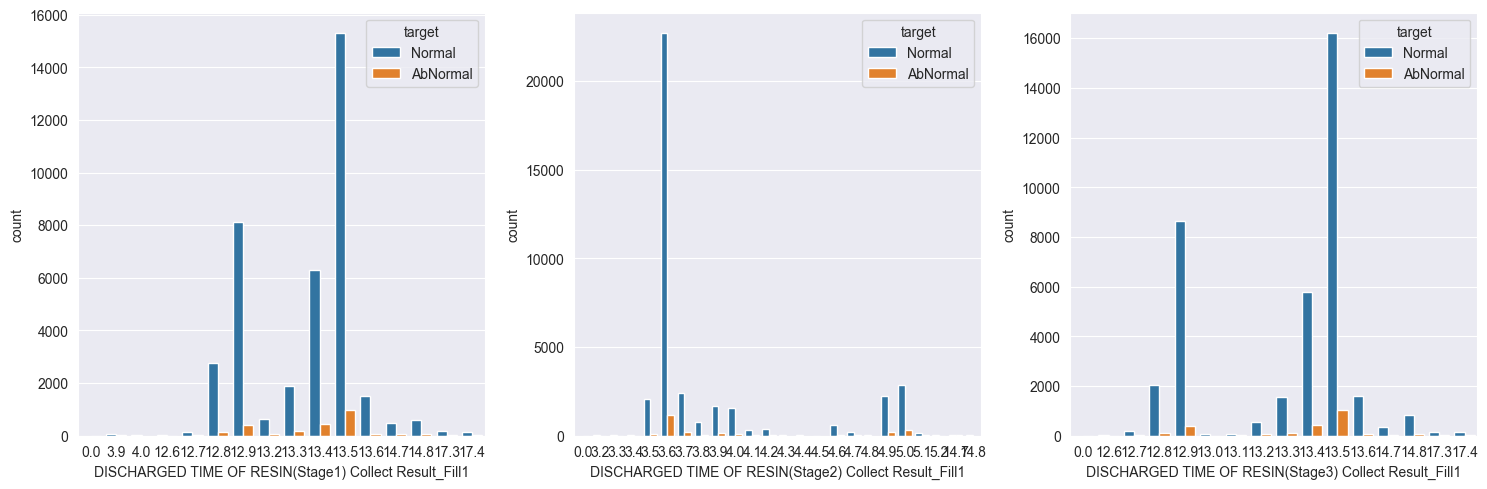

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1", hue="target", data=df, ax=axes[0]);
sns.countplot(x="DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1", hue="target", data=df, ax=axes[1]);
sns.countplot(x="DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1", hue="target", data=df, ax=axes[2]);
plt.tight_layout();

In [133]:
kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["DISCHARGED TIME OF RESIN(Stage1) Collect Result Bins_Fill1"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1"].values.reshape(-1,1))

In [134]:
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["DISCHARGED TIME OF RESIN(Stage2) Collect Result Bins_Fill1"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1"].values.reshape(-1,1))

In [135]:
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["DISCHARGED TIME OF RESIN(Stage3) Collect Result Bins_Fill1"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1"].values.reshape(-1,1))

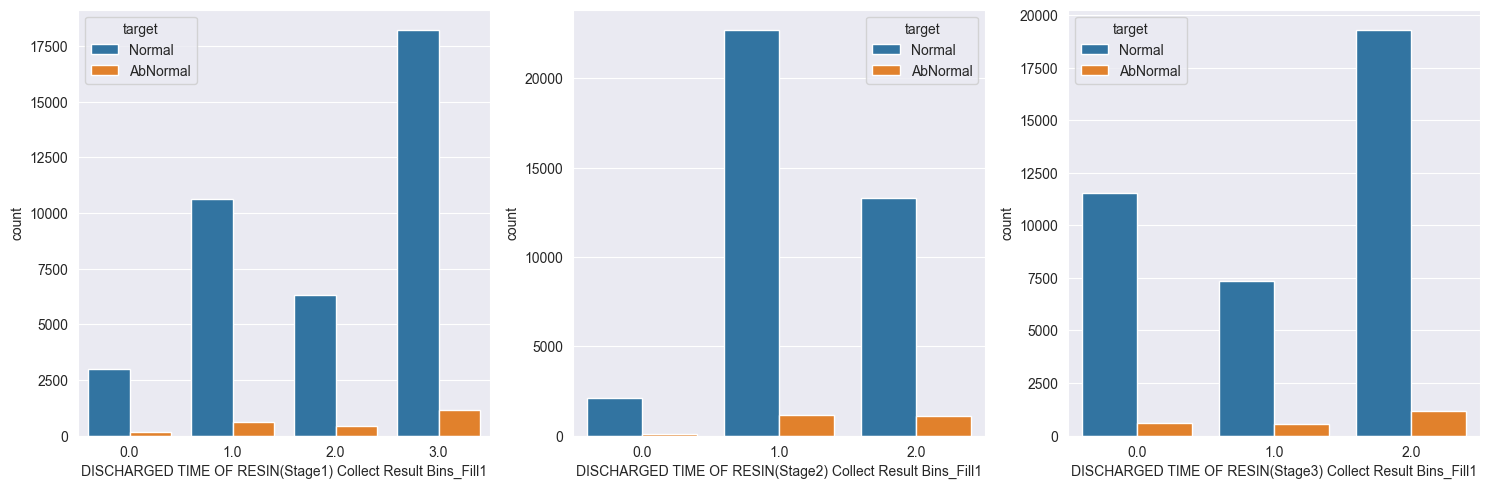

In [136]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="DISCHARGED TIME OF RESIN(Stage1) Collect Result Bins_Fill1", hue="target", data=df, ax=axes[0]);
sns.countplot(x="DISCHARGED TIME OF RESIN(Stage2) Collect Result Bins_Fill1", hue="target", data=df, ax=axes[1]);
sns.countplot(x="DISCHARGED TIME OF RESIN(Stage3) Collect Result Bins_Fill1", hue="target", data=df, ax=axes[2]);
plt.tight_layout();

#### Dispense

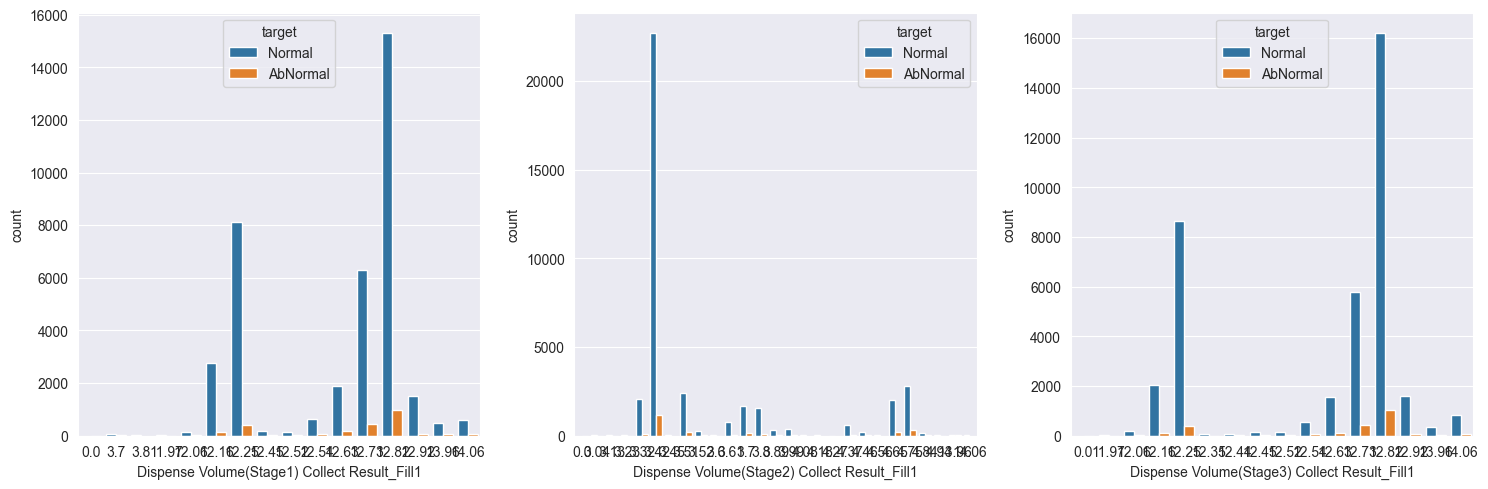

In [137]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="Dispense Volume(Stage1) Collect Result_Fill1", hue="target", data=df, ax=axes[0]);
sns.countplot(x="Dispense Volume(Stage2) Collect Result_Fill1", hue="target", data=df, ax=axes[1]);
sns.countplot(x="Dispense Volume(Stage3) Collect Result_Fill1", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

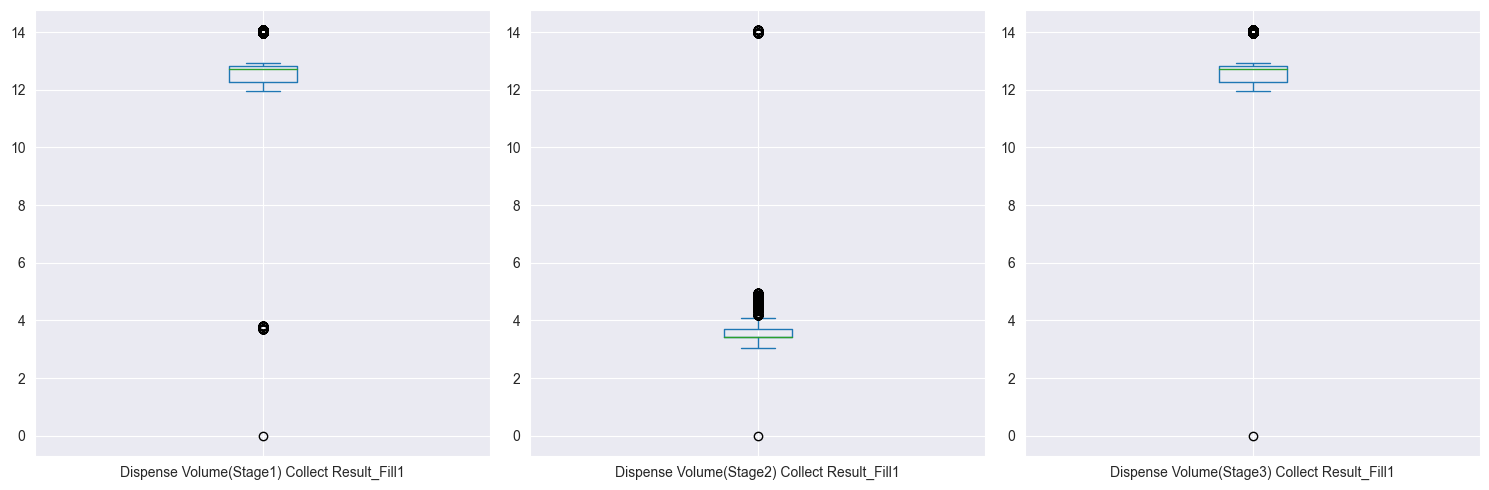

In [138]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df["Dispense Volume(Stage1) Collect Result_Fill1"].plot.box(ax=axes[0]);
df["Dispense Volume(Stage2) Collect Result_Fill1"].plot.box(ax=axes[1]);
df["Dispense Volume(Stage3) Collect Result_Fill1"].plot.box(ax=axes[2]);

plt.tight_layout();

In [139]:
kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["Dispense Volume(Stage1) Collect Result Bins_Fill1"] = kb.fit_transform(df["Dispense Volume(Stage1) Collect Result_Fill1"].values.reshape(-1,1))

In [140]:
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["Dispense Volume(Stage2) Collect Result Bins_Fill1"] = kb.fit_transform(df["Dispense Volume(Stage2) Collect Result_Fill1"].values.reshape(-1,1))

In [141]:
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["Dispense Volume(Stage3) Collect Result Bins_Fill1"] = kb.fit_transform(df["Dispense Volume(Stage3) Collect Result_Fill1"].values.reshape(-1,1))

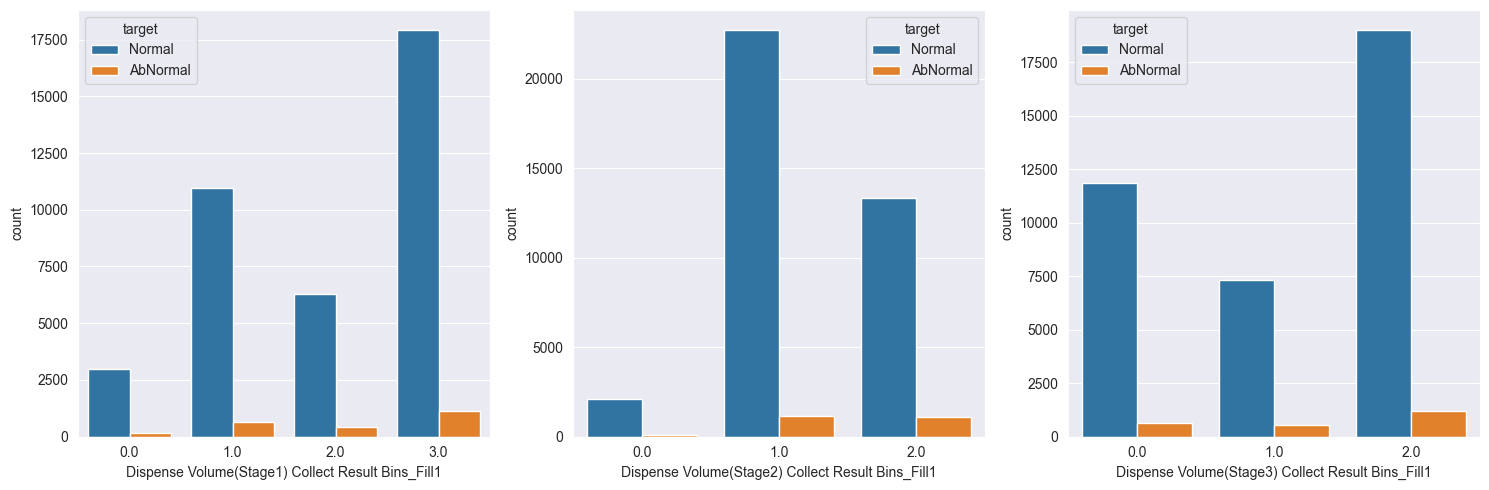

In [142]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="Dispense Volume(Stage1) Collect Result Bins_Fill1", hue="target", data=df, ax=axes[0]);
sns.countplot(x="Dispense Volume(Stage2) Collect Result Bins_Fill1", hue="target", data=df, ax=axes[1]);
sns.countplot(x="Dispense Volume(Stage3) Collect Result Bins_Fill1", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

#### HEAD NORMAL

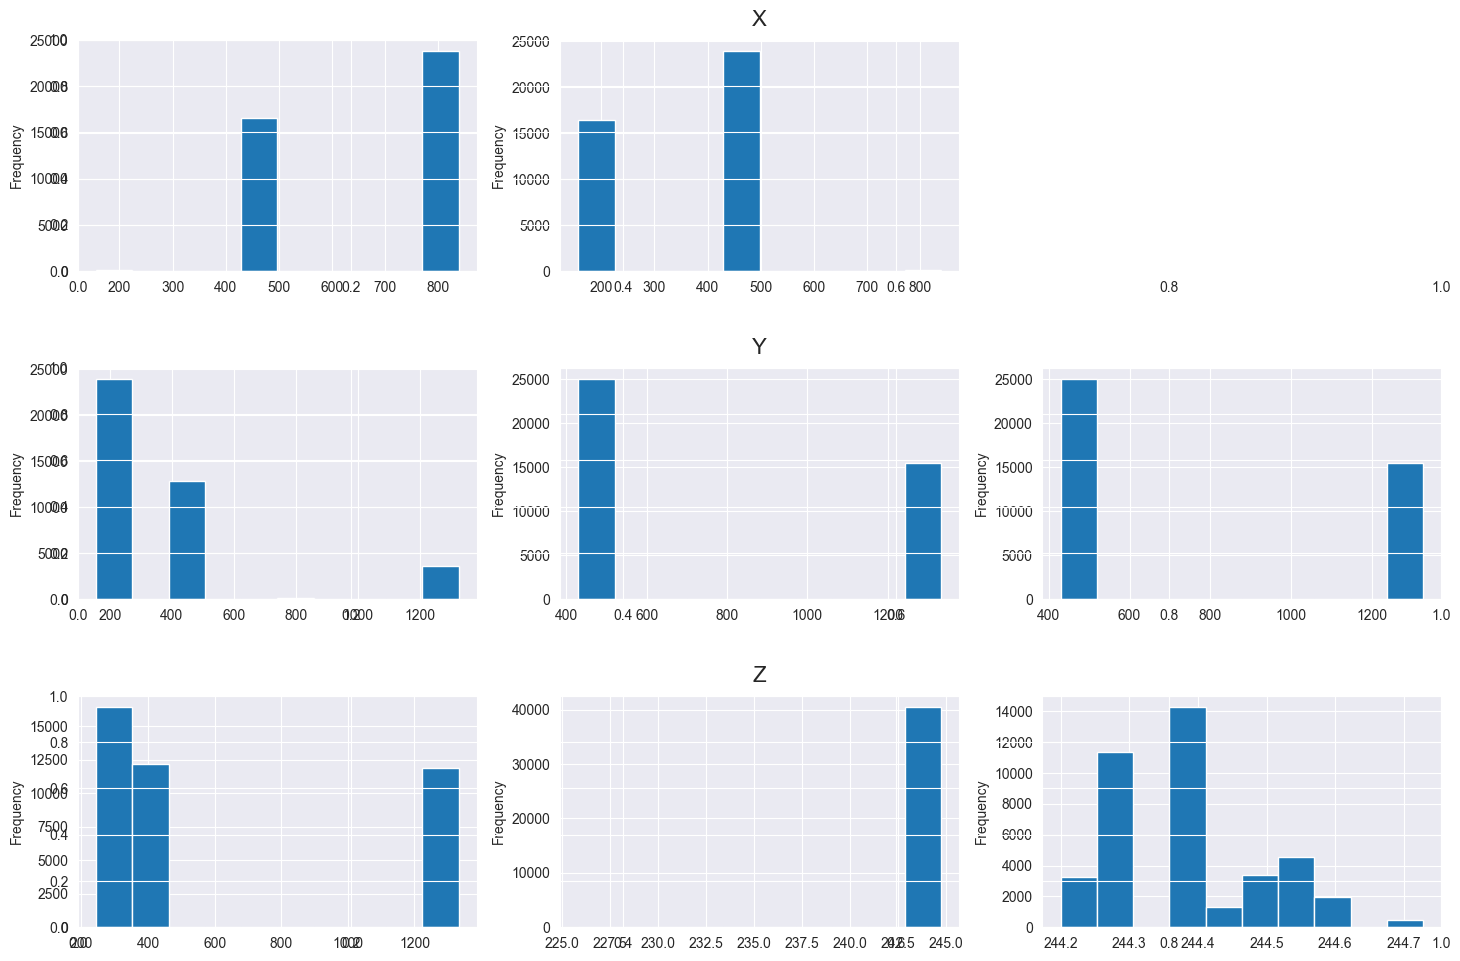

In [143]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))


df["HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1"].plot.hist(ax=axes[0, 0]);
df["HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1"].plot.hist(ax=axes[0, 1]);
axes[0, 2].remove()

df["HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1"].plot.hist(ax=axes[1, 0]);
df["HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1"].plot.hist(ax=axes[1, 1]);
df["HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1"].plot.hist(ax=axes[1, 2]);

df["HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1"].plot.hist(ax=axes[2, 0]);
df["HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1"].plot.hist(ax=axes[2, 1]);
df["HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1"].plot.hist(ax=axes[2, 2]);

fig.add_subplot(311, frame_on=False)
plt.title("X", fontsize=16, pad=10)

fig.add_subplot(312, frame_on=False)
plt.title("Y", fontsize=16, pad=10)

fig.add_subplot(313, frame_on=False)
plt.title("Z", fontsize=16, pad=10)

plt.tight_layout();

In [144]:
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result Bins_Fill1"] = kb.fit_transform(df["HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1"].values.reshape(-1,1))

kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result Bins_Fill1"] = kb.fit_transform(df["HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1"].values.reshape(-1,1))

In [145]:
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result Bins_Fill1"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1"].values.reshape(-1,1))


kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result Bins_Fill1"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1"].values.reshape(-1,1))

kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result Bins_Fill1"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1"].values.reshape(-1,1))

In [146]:
kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result Bins_Fill1"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1"].values.reshape(-1,1))


kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result Bins_Fill1"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1"].values.reshape(-1,1))


kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result Bins_Fill1"] = kb.fit_transform(df["HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1"].values.reshape(-1,1))

#### HEAD Standby

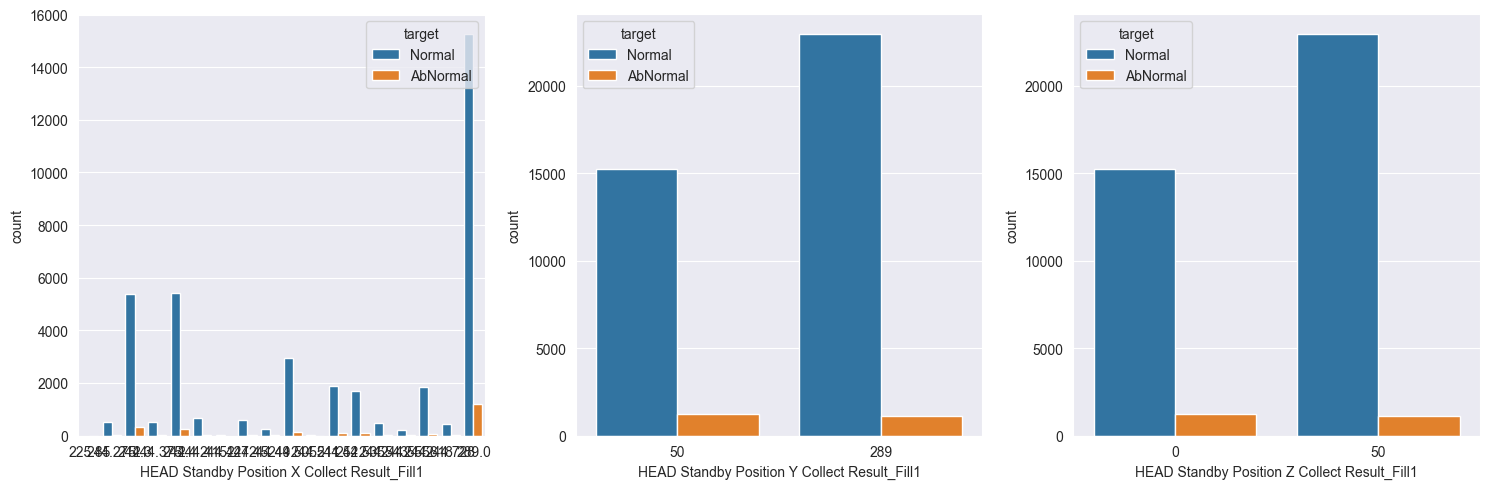

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="HEAD Standby Position X Collect Result_Fill1", hue="target", data=df, ax=axes[0]);
sns.countplot(x="HEAD Standby Position Y Collect Result_Fill1", hue="target", data=df, ax=axes[1]);
sns.countplot(x="HEAD Standby Position Z Collect Result_Fill1", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

In [148]:
df["HEAD Standby Position X Collect Result_Fill1"].value_counts()

289.000    16447
244.300     5719
244.400     5672
244.505     3094
244.520     1976
244.618     1924
244.535     1821
244.415      708
244.450      599
244.275      553
244.375      525
244.543      495
244.728      446
244.490      268
244.555      240
244.511       14
244.427        4
225.850        1
Name: HEAD Standby Position X Collect Result_Fill1, dtype: int64

In [149]:
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans', random_state=RANDOM_SEED)

df["HEAD Standby Position X Collect Result Bins_Fill1"] = kb.fit_transform(df["HEAD Standby Position X Collect Result_Fill1"].values.reshape(-1,1))

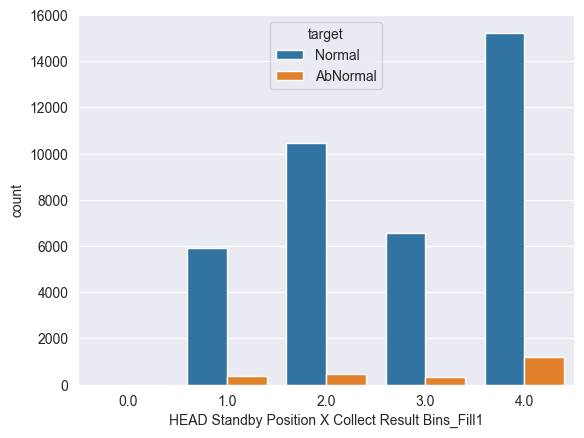

In [150]:
sns.countplot(x="HEAD Standby Position X Collect Result Bins_Fill1", hue="target", data=df);

#### Head Clean

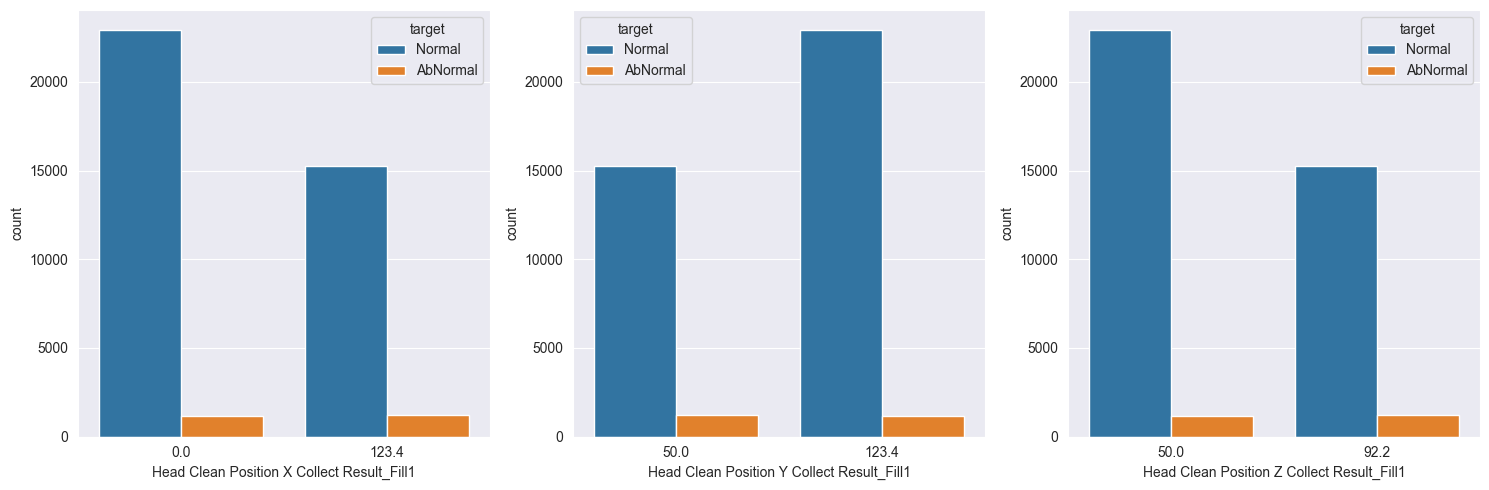

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="Head Clean Position X Collect Result_Fill1", hue="target", data=df, ax=axes[0]);
sns.countplot(x="Head Clean Position Y Collect Result_Fill1", hue="target", data=df, ax=axes[1]);
sns.countplot(x="Head Clean Position Z Collect Result_Fill1", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

#### Head Purge

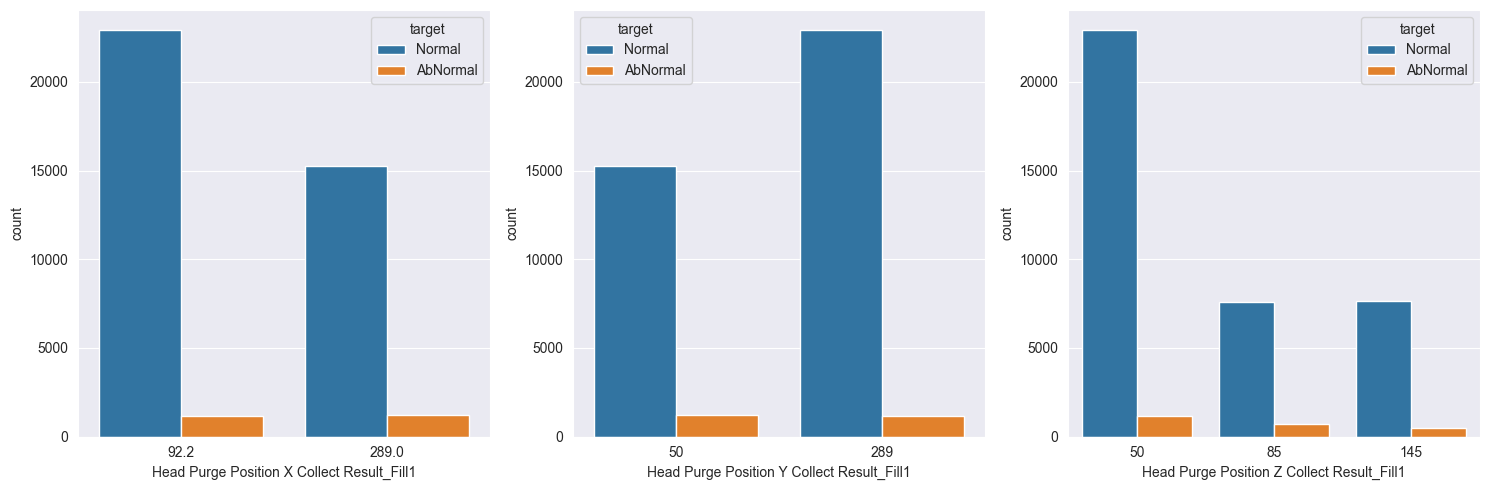

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="Head Purge Position X Collect Result_Fill1", hue="target", data=df, ax=axes[0]);
sns.countplot(x="Head Purge Position Y Collect Result_Fill1", hue="target", data=df, ax=axes[1]);
sns.countplot(x="Head Purge Position Z Collect Result_Fill1", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

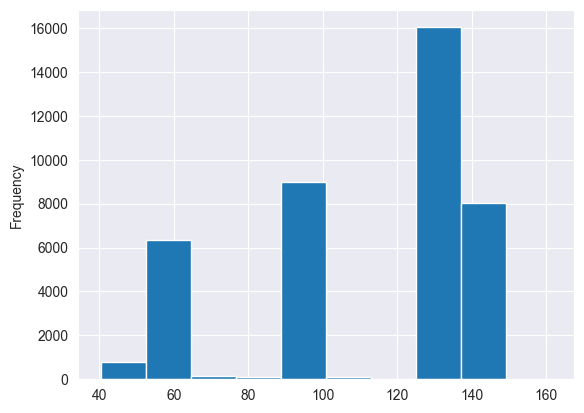

In [153]:
df["Machine Tact time Collect Result_Fill1"].plot.hist();

In [154]:
kb = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='kmeans', random_state=RANDOM_SEED)

df["Machine Tact time Collect Result Bins_Fill1"] = kb.fit_transform(df["Machine Tact time Collect Result_Fill1"].values.reshape(-1,1))

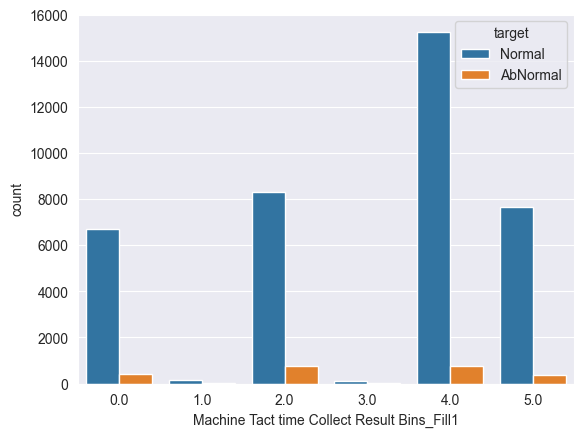

In [155]:
sns.countplot(x="Machine Tact time Collect Result Bins_Fill1", hue="target", data=df);

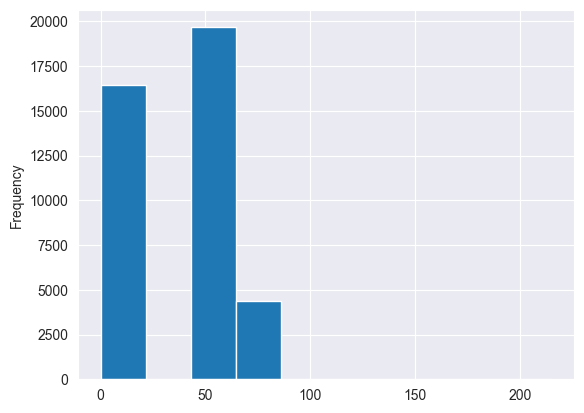

In [156]:
df["PalletID Collect Result_Fill1"].plot.hist();

In [157]:
kb = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["PalletID Collect Result Bins_Fill1"] = kb.fit_transform(df["PalletID Collect Result_Fill1"].values.reshape(-1,1))

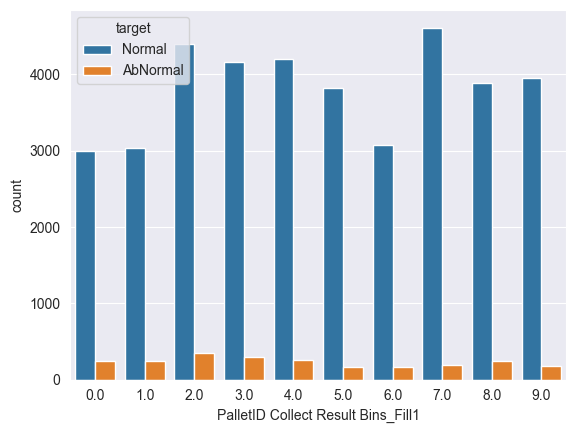

In [158]:
sns.countplot(x="PalletID Collect Result Bins_Fill1", hue="target", data=df);

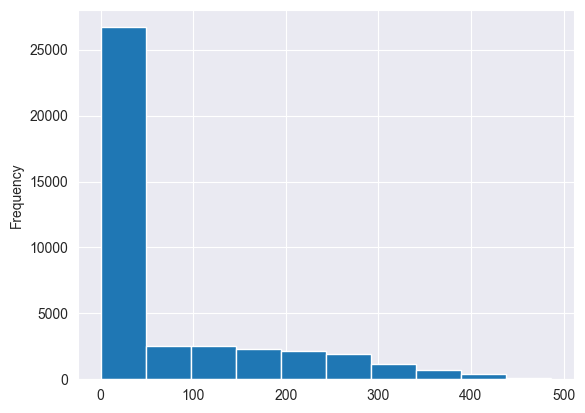

In [159]:
df["Production Qty Collect Result_Fill1"].plot.hist();

In [160]:
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["Production Qty Collect Result Bins_Fill1"] = kb.fit_transform(df["Production Qty Collect Result_Fill1"].values.reshape(-1,1))

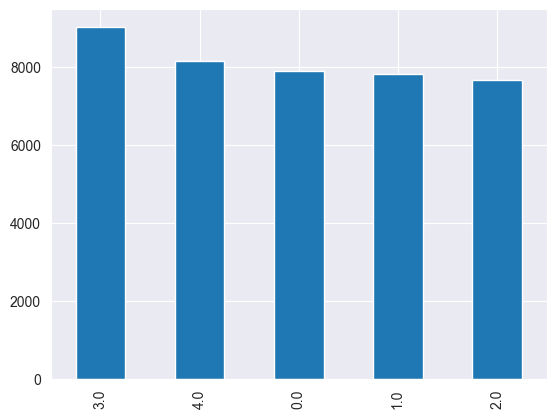

In [161]:
df["Production Qty Collect Result Bins_Fill1"].value_counts().plot.bar();

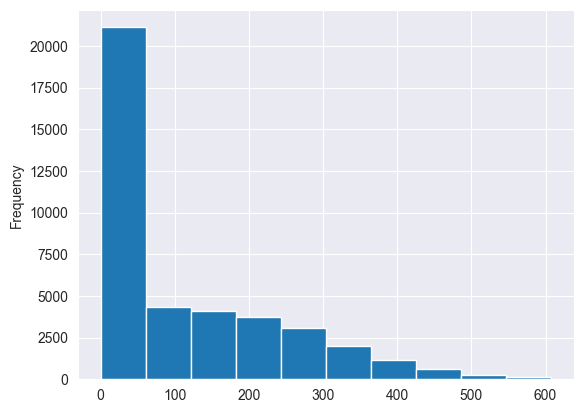

In [162]:
df["Receip No Collect Result_Fill1"].plot.hist();

In [163]:
kb = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans', random_state=RANDOM_SEED)

df["Receip No Collect Result Bins_Fill1"] = kb.fit_transform(df["Receip No Collect Result_Fill1"].values.reshape(-1,1))

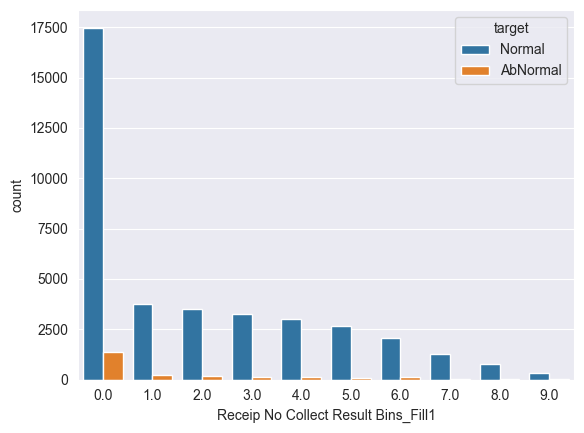

In [164]:
sns.countplot(x="Receip No Collect Result Bins_Fill1", hue="target", data=df);

In [165]:
df["WorkMode Collect Result_Fill1"].value_counts()

1     22829
7     16447
6       983
9        96
17       86
3        64
4         1
Name: WorkMode Collect Result_Fill1, dtype: int64

### Fill2

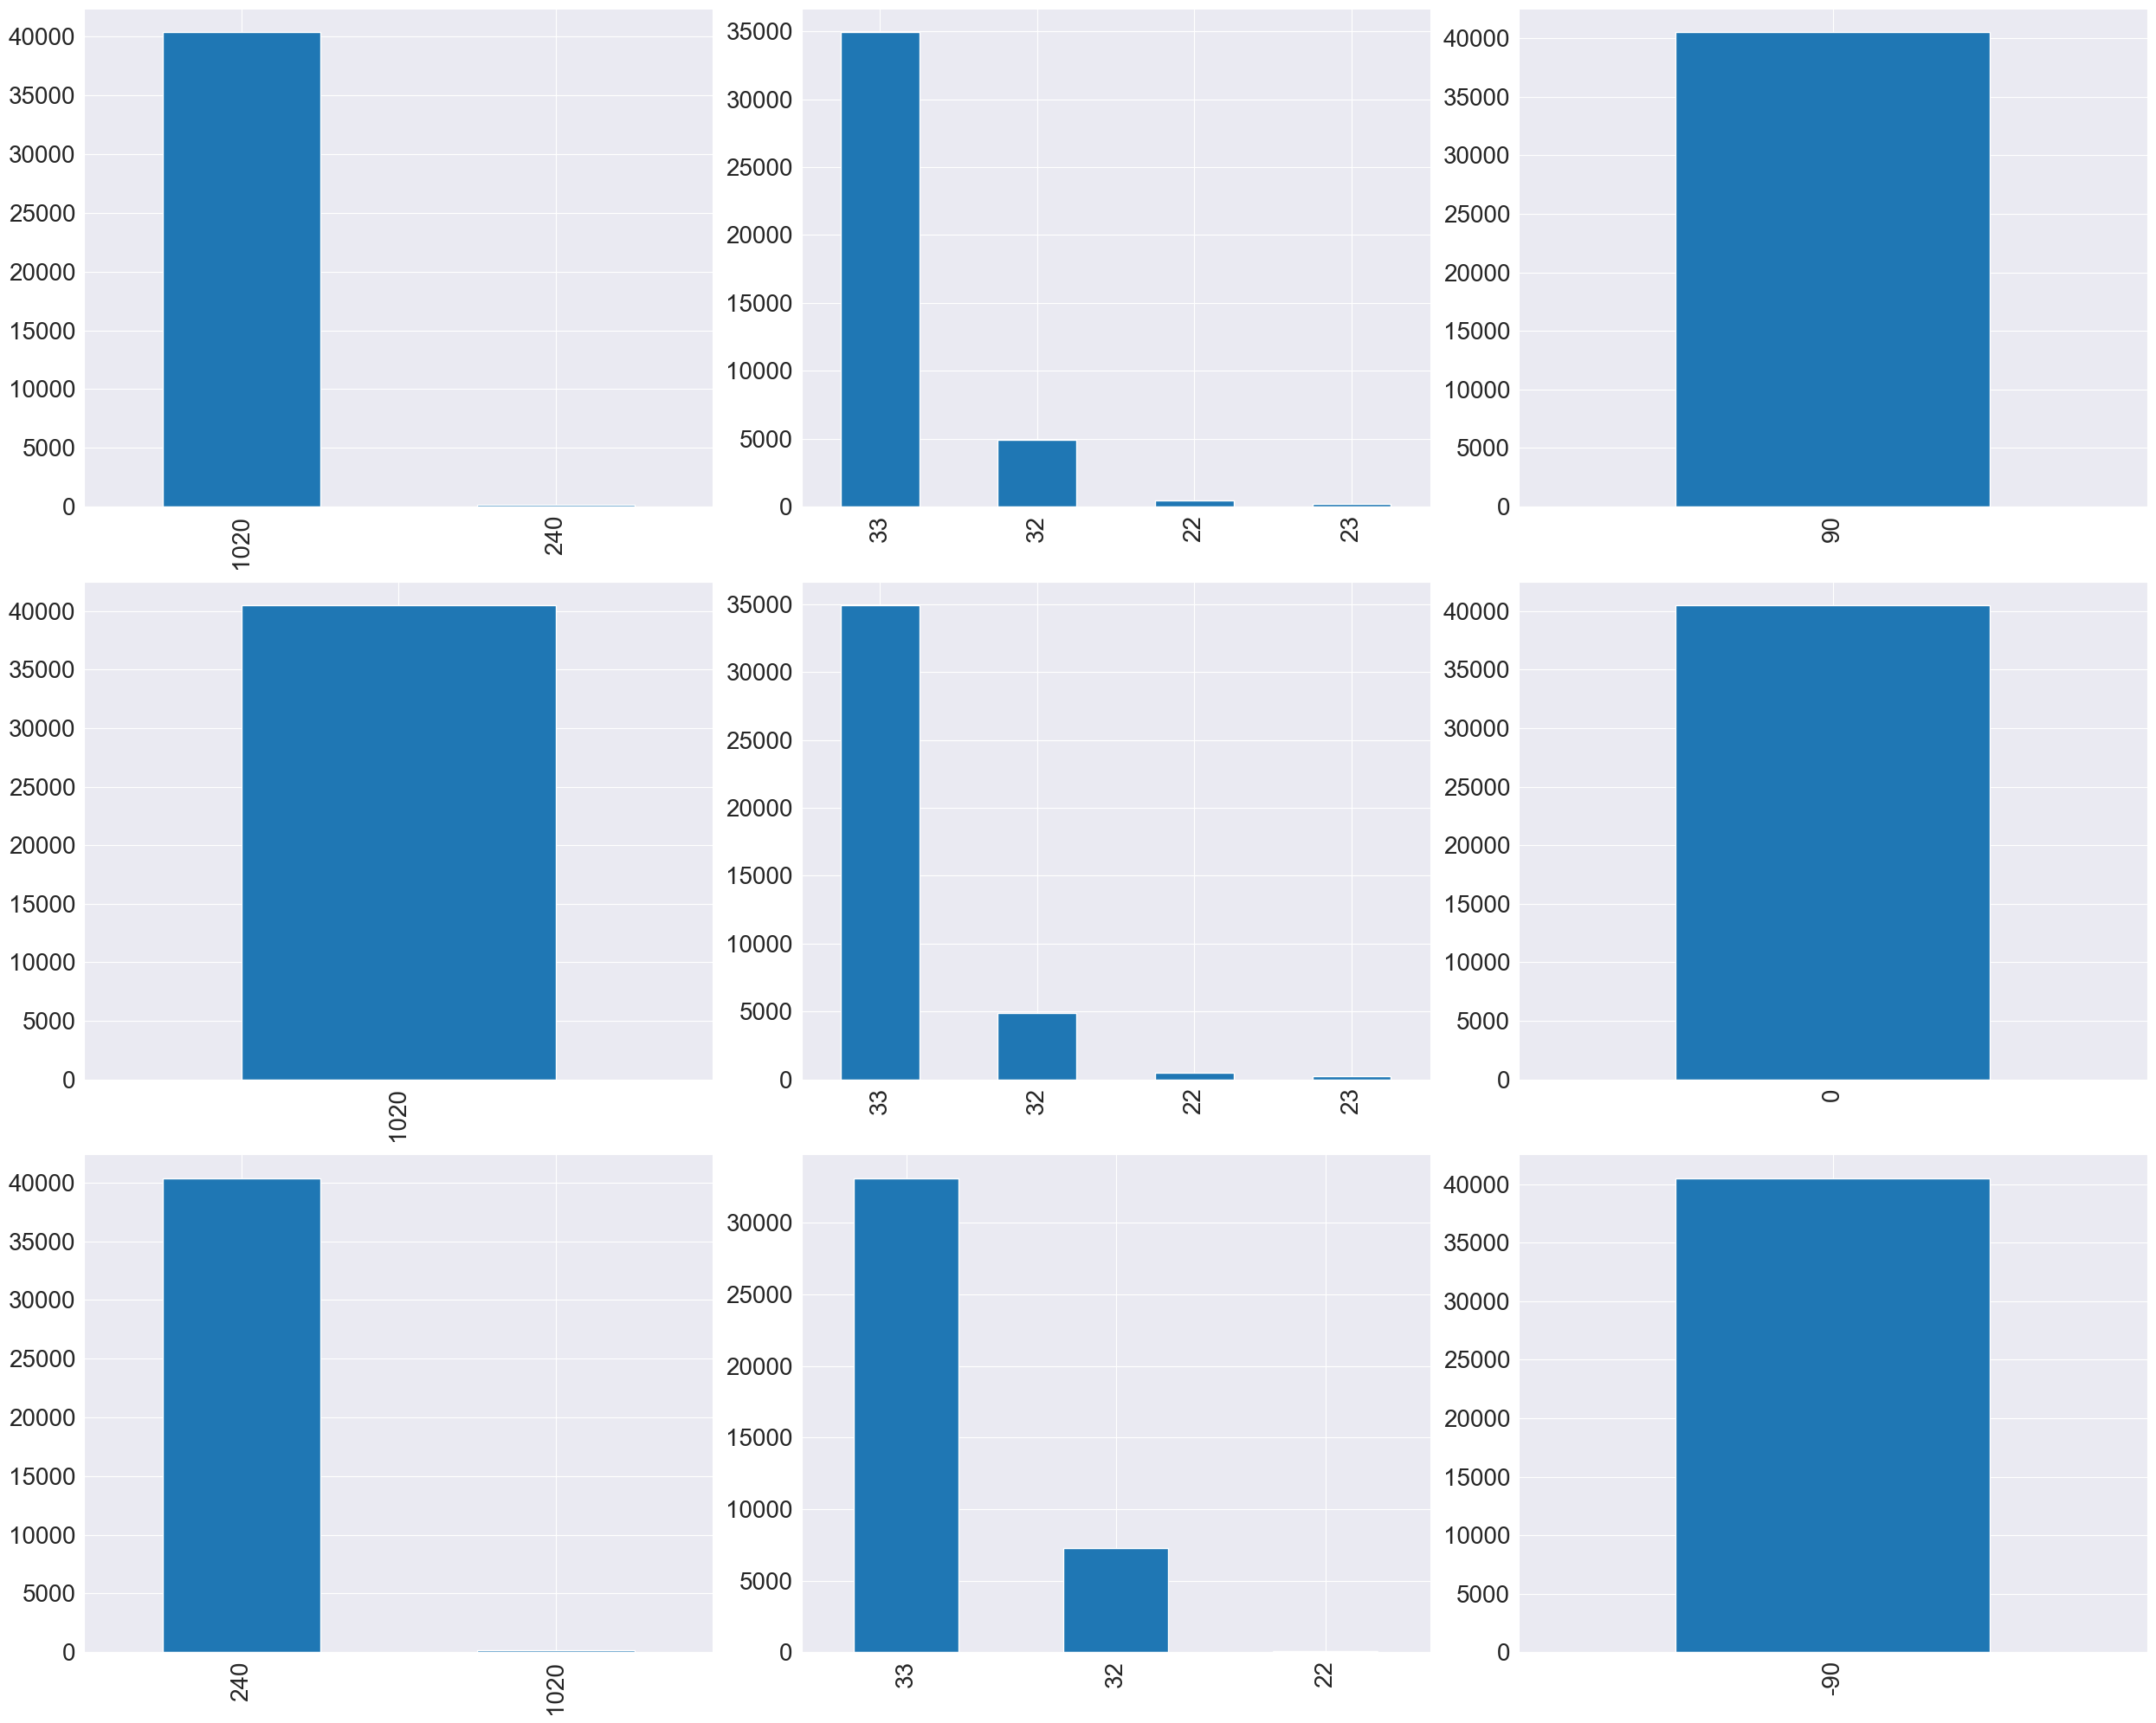

In [166]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))

df["CURE START POSITION X Collect Result_Fill2"].value_counts().plot.bar(ax=axes[0, 0]);
df["CURE START POSITION Z Collect Result_Fill2"].value_counts().plot.bar(ax=axes[0, 1]);
df["CURE START POSITION Θ Collect Result_Fill2"].value_counts().plot.bar(ax=axes[0, 2]);

df["CURE STANDBY POSITION X Collect Result_Fill2"].value_counts().plot.bar(ax=axes[1, 0]);
df["CURE STANDBY POSITION Z Collect Result_Fill2"].value_counts().plot.bar(ax=axes[1, 1]);
df["CURE STANDBY POSITION Θ Collect Result_Fill2"].value_counts().plot.bar(ax=axes[1, 2]);

df["CURE END POSITION X Collect Result_Fill2"].value_counts().plot.bar(ax=axes[2, 0]);
df["CURE END POSITION Z Collect Result_Fill2"].value_counts().plot.bar(ax=axes[2, 1]);
df["CURE END POSITION Θ Collect Result_Fill2"].value_counts().plot.bar(ax=axes[2, 2]);

for ax in axes.flat:
    ax.tick_params(axis='both', which='major', labelsize=20)
          
plt.tight_layout();

In [167]:
# 단일값이라 삭제
df.drop(["CURE STANDBY POSITION X Collect Result_Fill2",
         "CURE START POSITION Θ Collect Result_Fill2",
         "CURE STANDBY POSITION Θ Collect Result_Fill2",
         "CURE END POSITION Θ Collect Result_Fill2",], axis=1, inplace=True)

In [168]:
df["CURE START POSITION Z Collect Result_Fill2"].equals(df["CURE STANDBY POSITION Z Collect Result_Fill2"])

True

In [169]:
# 중복값 행이므로 START POSITION만 남기고 삭제
df.drop(["CURE STANDBY POSITION Z Collect Result_Fill2"], axis=1, inplace=True)

In [170]:
df["CURE SPEED Collect Result_Fill2"].value_counts()

50    34672
48     2640
45     2321
51      530
55      269
40       37
53       36
75        1
Name: CURE SPEED Collect Result_Fill2, dtype: int64

In [171]:
df[df["CURE SPEED Collect Result_Fill2"] == 75]["target"]

25833    Normal
Name: target, dtype: object

In [172]:
# 75인 행 하나 삭제
cond = df["CURE SPEED Collect Result_Fill2"] == 75
df.drop(df[cond].index, inplace=True)

#### DISCHARGED

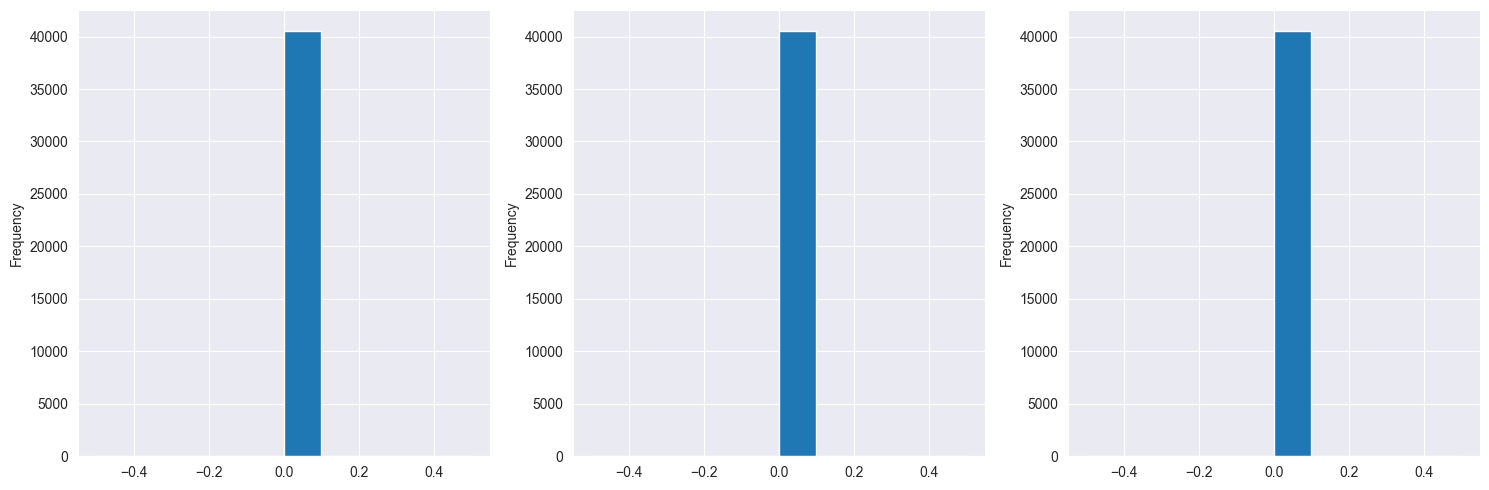

In [173]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill2"].plot.hist(ax=axes[0]);
df["DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill2"].plot.hist(ax=axes[1]);
df["DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill2"].plot.hist(ax=axes[2]);

plt.tight_layout();

In [174]:
# 단일값이라 삭제
df.drop(["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill2",
         "DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill2",
         "DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill2"], axis=1, inplace=True)

In [175]:
# 단일값이라 삭제
df.drop(["DISCHARGED SPEED OF RESIN Collect Result_Fill2"], axis=1, inplace=True)

#### Dispense

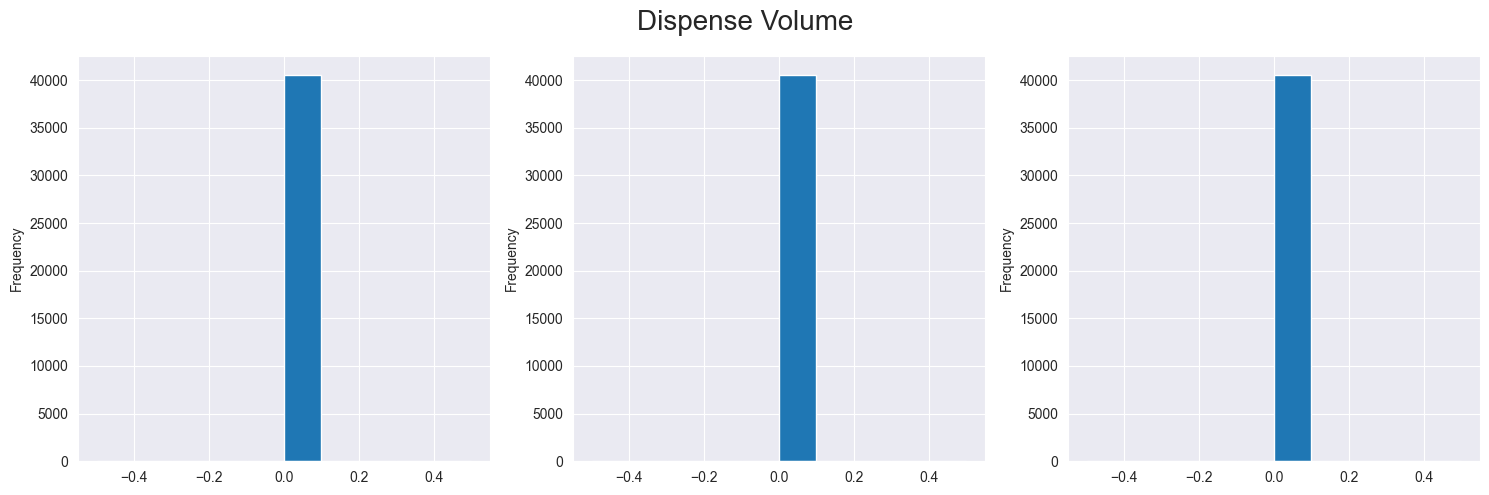

In [176]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df["Dispense Volume(Stage1) Collect Result_Fill2"].plot.hist(ax=axes[0]);
df["Dispense Volume(Stage2) Collect Result_Fill2"].plot.hist(ax=axes[1]);
df["Dispense Volume(Stage3) Collect Result_Fill2"].plot.hist(ax=axes[2]);
plt.suptitle("Dispense Volume", size=20)
plt.tight_layout();

In [177]:
dispense_fill2 = ["Dispense Volume(Stage1) Collect Result_Fill2",
                  "Dispense Volume(Stage2) Collect Result_Fill2",
                  "Dispense Volume(Stage3) Collect Result_Fill2"]
df[dispense_fill2].drop_duplicates()

,Dispense Volume(Stage1) Collect Result_Fill2,Dispense Volume(Stage2) Collect Result_Fill2,Dispense Volume(Stage3) Collect Result_Fill2
0,0,0.0,0


In [178]:
# 단일값이라 삭제
df.drop(dispense_fill2, axis=1, inplace=True)

#### HEAD NORMAL

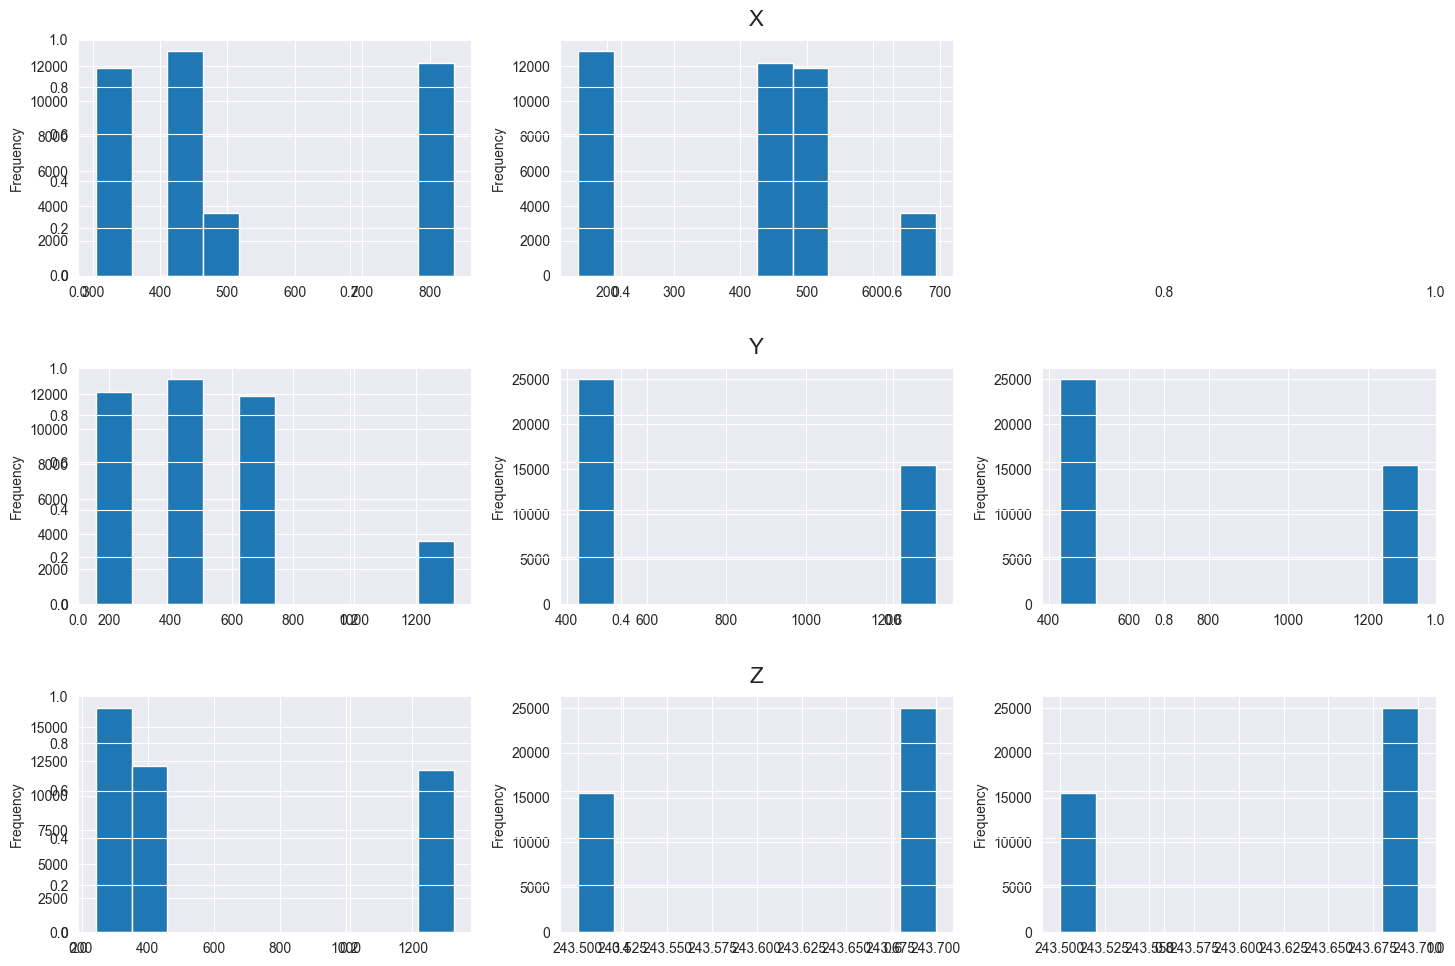

In [179]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))


df["HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2"].plot.hist(ax=axes[0, 0]);
df["HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2"].plot.hist(ax=axes[0, 1]);
axes[0, 2].remove()

df["HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2"].plot.hist(ax=axes[1, 0]);
df["HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2"].plot.hist(ax=axes[1, 1]);
df["HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2"].plot.hist(ax=axes[1, 2]);

df["HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2"].plot.hist(ax=axes[2, 0]);
df["HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2"].plot.hist(ax=axes[2, 1]);
df["HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2"].plot.hist(ax=axes[2, 2]);

fig.add_subplot(311, frame_on=False)
plt.title("X", fontsize=16, pad=10)

fig.add_subplot(312, frame_on=False)
plt.title("Y", fontsize=16, pad=10)

fig.add_subplot(313, frame_on=False)
plt.title("Z", fontsize=16, pad=10)

plt.tight_layout();

In [180]:
df["HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2"].value_counts()

1324.2    15480
427.9     12868
428.0     12157
Name: HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2, dtype: int64

In [181]:
df["HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2"].value_counts()

1324.2    15480
428.0     12868
427.9     12157
Name: HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2, dtype: int64

In [182]:
df["HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2"].equals(df["HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2"])

True

In [183]:
# 중복값이라 Stage2만 남기고 삭제
df.drop(["HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2"], axis=1, inplace=True)

#### HEAD Standby

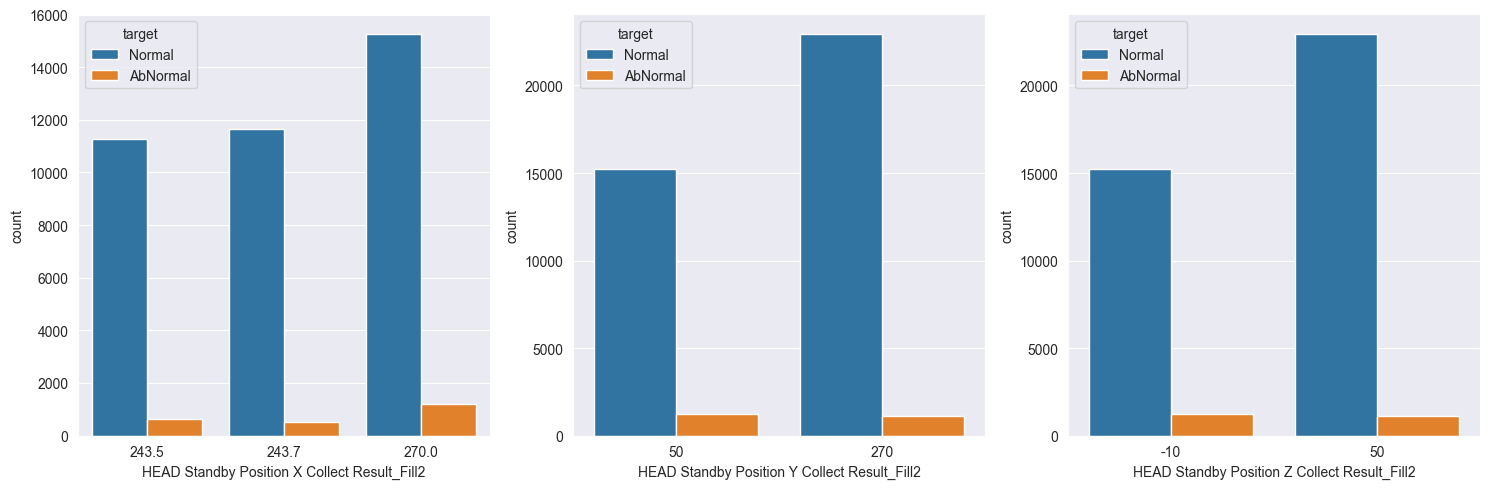

In [184]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="HEAD Standby Position X Collect Result_Fill2", hue="target", data=df, ax=axes[0]);
sns.countplot(x="HEAD Standby Position Y Collect Result_Fill2", hue="target", data=df, ax=axes[1]);
sns.countplot(x="HEAD Standby Position Z Collect Result_Fill2", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

#### Head Clean

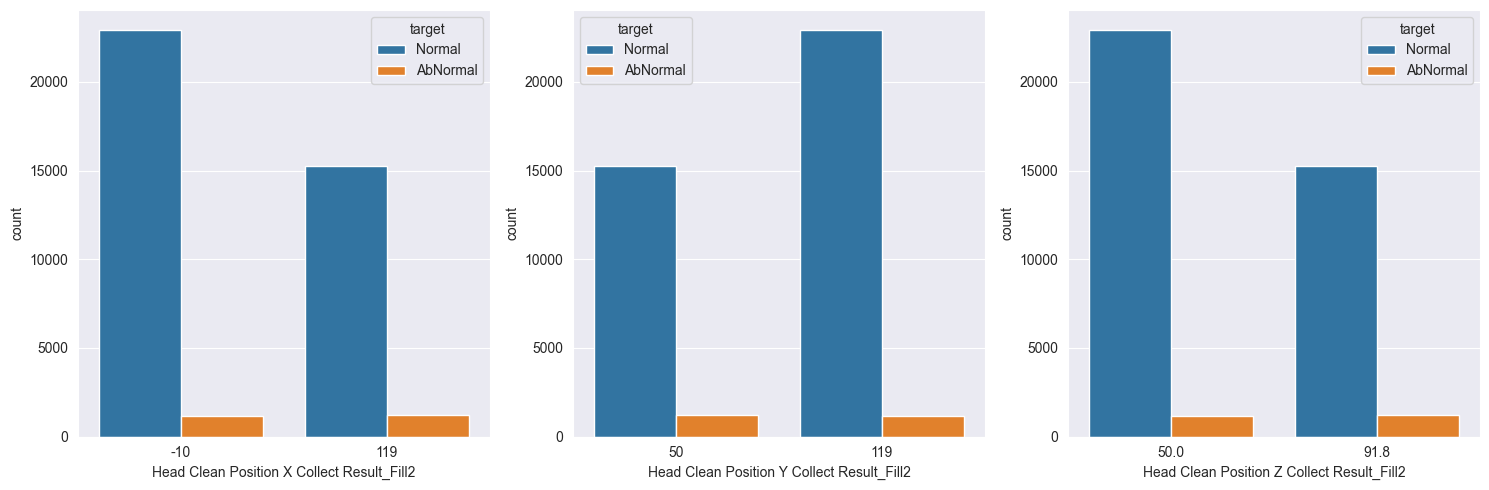

In [185]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="Head Clean Position X Collect Result_Fill2", hue="target", data=df, ax=axes[0]);
sns.countplot(x="Head Clean Position Y Collect Result_Fill2", hue="target", data=df, ax=axes[1]);
sns.countplot(x="Head Clean Position Z Collect Result_Fill2", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

#### Head Purge

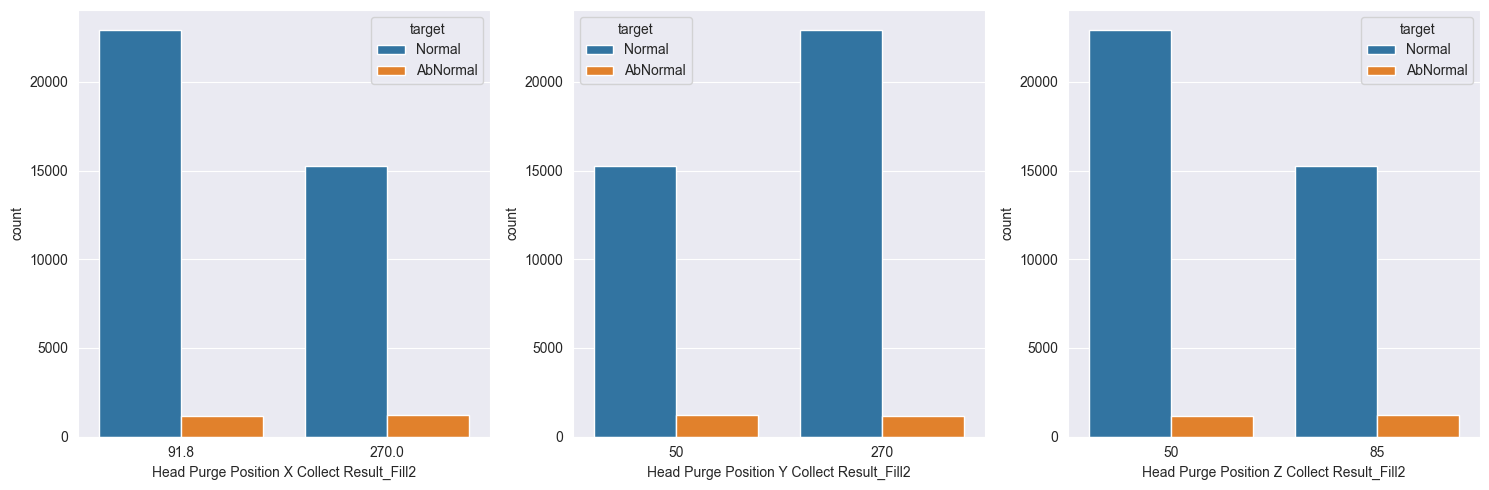

In [186]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x="Head Purge Position X Collect Result_Fill2", hue="target", data=df, ax=axes[0]);
sns.countplot(x="Head Purge Position Y Collect Result_Fill2", hue="target", data=df, ax=axes[1]);
sns.countplot(x="Head Purge Position Z Collect Result_Fill2", hue="target", data=df, ax=axes[2]);

plt.tight_layout();

In [187]:
df["HEAD Standby Position Y Collect Result_Fill2"].equals(df["Head Purge Position Y Collect Result_Fill2"])

True

In [188]:
# 중복값이라 Standby만 남기고 삭제
df.drop("Head Purge Position Y Collect Result_Fill2", axis=1, inplace=True)

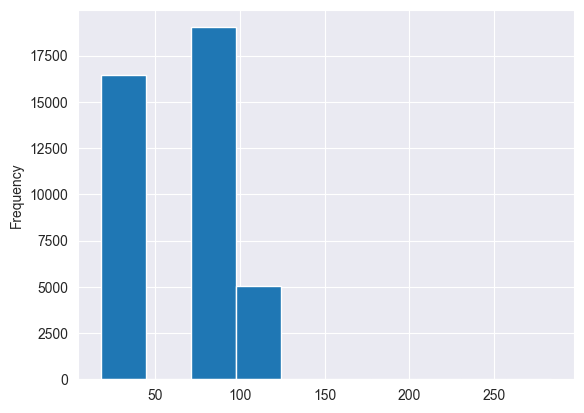

In [189]:
df["Machine Tact time Collect Result_Fill2"].plot.hist();

In [190]:
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["Machine Tact time Collect Result Bins_Fill2"] = kb.fit_transform(df["Machine Tact time Collect Result_Fill2"].values.reshape(-1,1))

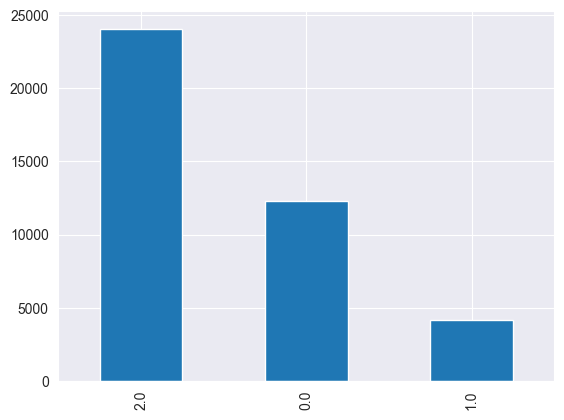

In [191]:
df["Machine Tact time Collect Result Bins_Fill2"].value_counts().plot.bar();

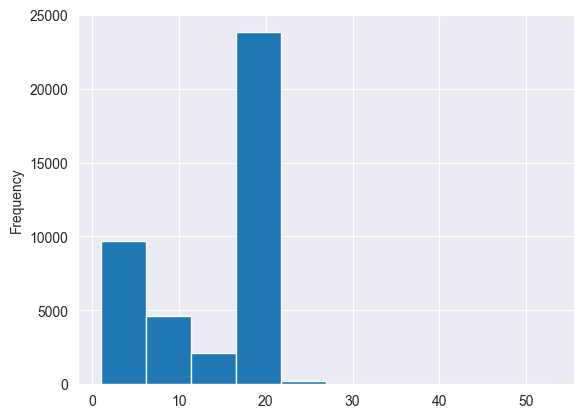

In [192]:
df["PalletID Collect Result_Fill2"].plot.hist();

In [193]:
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["PalletID Collect Result Bins_Fill2"] = kb.fit_transform(df["PalletID Collect Result_Fill2"].values.reshape(-1,1))

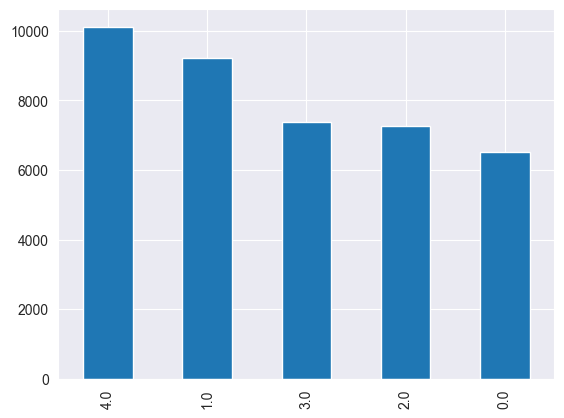

In [194]:
df["PalletID Collect Result Bins_Fill2"].value_counts().plot.bar();

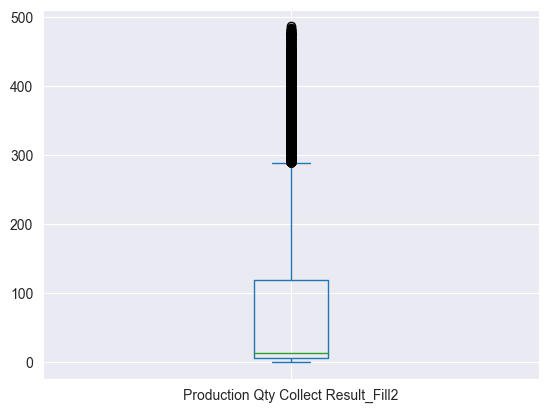

In [195]:
df["Production Qty Collect Result_Fill2"].plot.box();
# Dam이랑 boxplot 거의 비슷함

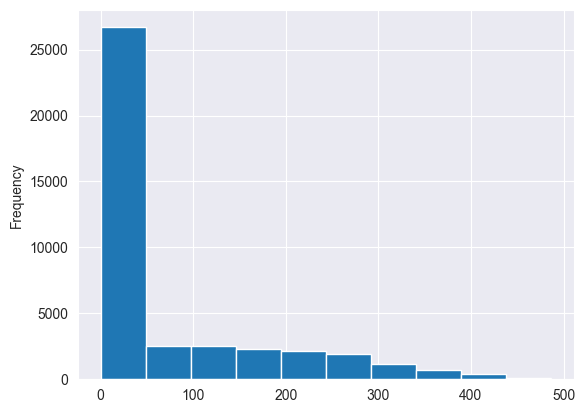

In [196]:
df["Production Qty Collect Result_Fill2"].plot.hist();

In [197]:
diff = df[df["Production Qty Collect Result_Dam"] != df["Production Qty Collect Result_Fill2"]]

In [198]:
diff[["Production Qty Collect Result_Dam", "Production Qty Collect Result_Fill2"]]
# Production Qty Collect Result Dam이랑 Fill2 거의 비슷함

,Production Qty Collect Result_Dam,Production Qty Collect Result_Fill2
137,15,16
1079,5,7
1832,213,232
2118,15,13
2164,8,6
...,...,...
37520,13,8
37886,2,6
38377,261,345
38762,115,131


In [199]:
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["Production Qty Collect Result Bins_Fill2"] = kb.fit_transform(df["Production Qty Collect Result_Fill2"].values.reshape(-1,1))

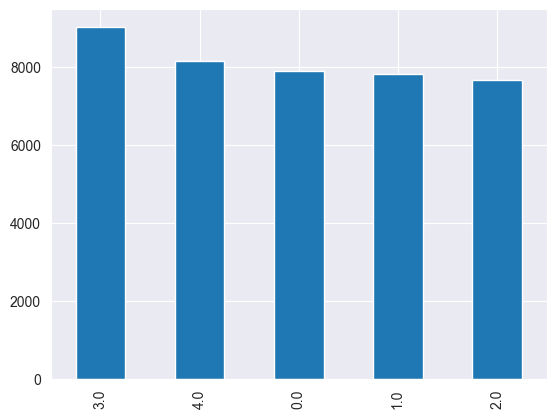

In [200]:
df["Production Qty Collect Result Bins_Fill2"].value_counts().plot.bar();

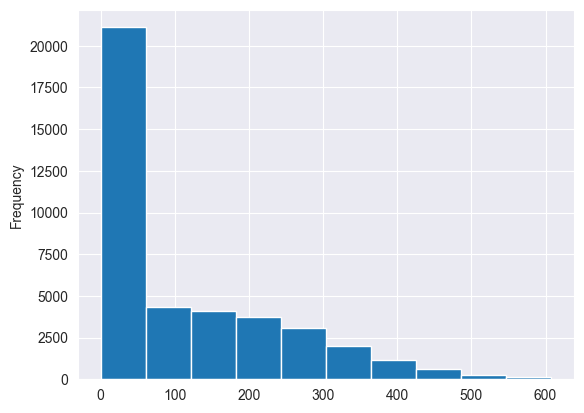

In [201]:
df["Receip No Collect Result_Fill2"].plot.hist();

In [202]:
kb = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans', random_state=RANDOM_SEED)

df["Receip No Collect Result Bins_Fill2"] = kb.fit_transform(df["Receip No Collect Result_Fill2"].values.reshape(-1,1))

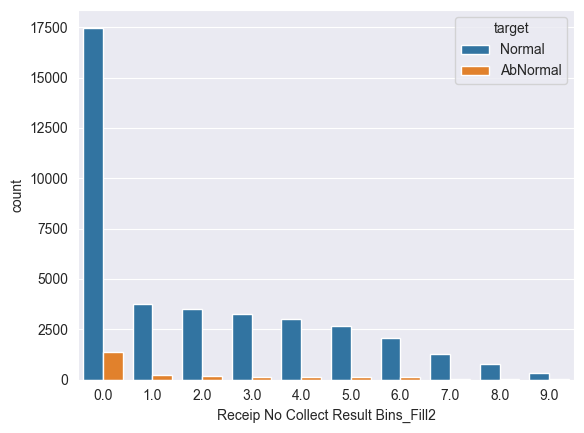

In [203]:
sns.countplot(x="Receip No Collect Result Bins_Fill2", hue="target", data=df);

In [204]:
df["WorkMode Collect Result_Fill2"].value_counts()

1     22829
0     16447
6       983
9        96
17       86
3        64
Name: WorkMode Collect Result_Fill2, dtype: int64

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40505 entries, 0 to 40505
Columns: 175 entries, Equipment_Dam to Receip No Collect Result Bins_Fill2
dtypes: float64(110), int64(57), object(8)
memory usage: 54.4+ MB


In [206]:
df.drop(["Workorder"], axis=1, inplace=True)

In [207]:
# save csv
df.to_csv(os.path.join(ROOT_DIR, "train_v2.csv"), index=False)